(chap1)=

# 1. Bayesian Inference

Modern Bayesian statistics is mostly performed using computer code. This
has dramatically changed how Bayesian statistics was performed from even
a few decades ago. The complexity of models we can build has increased,
and the barrier of necessary mathematical and computational skills has
been lowered. Additionally, the iterative modeling process has become,
in many aspects, much easier to perform and more relevant than ever. The
popularization of very powerful computer methods is really great but
also demands an increased level of responsibility. Even if expressing
statistical methods is easier than ever, statistics is a field full of
subtleties that do not magically disappear by using powerful
computational methods. Therefore having a good background about
theoretical aspects, especially those relevant in practice, is extremely
useful to effectively apply statistical methods. In this first chapter,
we introduce these concepts and methods, many of which will be further
explored and expanded throughout the rest of the book.

(bayesian_modeling)=

## 1.1 Bayesian Modeling

A conceptual model is a representation of a system, made of the
composition of concepts that are used to help people know, understand,
or simulate the object or process the model represents
{cite:p}`wikipedia_model_2020`. Additionally, models are human-designed
representations with very specific goals in mind. As such, it is
generally more convenient to talk about the adequacy of the model to a
given problem than its intrinsic correctness. Models exist solely as an
aid to a further goal.

When designing a new car, a car company makes a physical model to help
others understand how the product will look when it is built. In this
case, a sculptor with prior knowledge of cars, and a good estimate of
how the model will be used, takes a supply of raw material such as clay,
uses hand tools to sculpt a physical model. This physical model can help
inform others about various aspects of the design, such as whether the
appearance is aesthetically pleasing, or if the shape of the car is
aerodynamic. It takes a combination of domain expertise and sculpting
expertise to achieve a useful result. The modeling process often
requires building more than one model, either to explore different
options or because the models are iteratively improved and expanded as a
result of the interaction with other members of the car development
team. These days it is also common that in addition to a physical car
model, there is a digital model built-in Computer-Aided Design software.
This computer model has some advantages over a physical one. It is
simpler and cheaper to use for digital for crash simulations versus
testing on physical cars. It is also easier to share this model with
colleagues in different offices.

These same ideas are relevant in Bayesian modeling. Building a model
requires a combination of domain expertise and statistical skill to
incorporate knowledge into some computable objectives and determine the
usefulness of the result. Data is the raw material, and statistical
distributions are the main mathematical tools to shape the statistical
model. It takes a combination of domain expertise and statistical
expertise to achieve a useful result. Bayesian practitioners also build
more than one model in an iterative fashion, the first of which is
primarily useful for the practitioner themselves to identify gaps in
their thinking, or shortcomings in their models. These first sets of
models are then used to build subsequent improved and expanded models.
Additionally, the use of one inference mechanism does not obviate the
utility for all others, just as a physical model of a car does not
obviate the utility of a digital model. In the same way, the modern
Bayesian practitioner has many ways to express their ideas, generate
results, and share the outputs, allowing a much wider distribution of
positive outcomes for the practitioner and their peers.

(bayesian-models)=

### 1.1.1 Bayesian Models

Bayesian models, computational or otherwise, have two defining
characteristics:

-   Unknown quantities are described using probability distributions
    [^1]. We call these quantities parameters [^2].

-   Bayes' theorem is used to update the values of the parameters
    conditioned on the data. We can also see this process as a
    reallocation of probabilities.

At a high-level we can describe the process of constructing Bayesian
modeling in 3 steps.

1.  Given some data and some assumptions on how this data could have
    been generated, we design a model by combining and transforming
    random variables.

2.  We use Bayes' theorem to condition our models to the available data.
    We call this process **inference**, and as a result we obtain a
    posterior distribution. We hope the data reduces the uncertainty for
    possible parameter values, though this is not a guarantee of any
    Bayesian model.

3.  We criticize the model by checking whether the model makes sense
    according to different criteria, including the data and our
    expertise on the domain-knowledge. Because we generally are
    uncertain about the models themselves, we sometimes compare several
    models.

If you are familiar with other forms of modeling, you will recognize the
importance of criticizing models and the necessity of performing these 3
steps iteratively. For example, we may need to retrace our steps at any
given point. Perhaps we introduced a, silly, coding mistake, or after
some challenges we found a way to improve the model, or we find that the
data is not useful as we originally thought, and we need to collect more
data or even a different kind of data.

Throughout this book we will discuss different ways to perform each of
these 3 steps and we will learn about ways to expand them into a more
complex **Bayesian workflow**. We consider this topic so important that
we dedicated an entire Chapter [9](chap9) to revisit and
rediscuss these ideas.

[^1]: If you want to be more general you can even say that everything is
    a probability distribution as a quantity you assume to know with
    arbitrary precision that can be described by a Dirac delta function.

[^2]: Some authors call these quantities latent variables and reserve
    the name parameter to identify fixed, but unknown, quantities.

(Bayesian_inference)=

### 1.1.2 Bayesian Inference

In colloquial terms, inference is associated with obtaining conclusions
based on evidence and reasoning. Bayesian inference is a particular form
of statistical inference based on combining probability distributions in
order to obtain other probability distributions. Bayes' theorem provides
us with a general recipe to estimate the value of the parameter
$\boldsymbol{\theta}$ given that we have observed some data
$\boldsymbol{Y}$:

```{math}
:label: eq:posterior_dist
\underbrace{p(\boldsymbol{\theta} \mid \boldsymbol{Y})}_{\text{posterior}} = \frac{\overbrace{p(\boldsymbol{Y} \mid \boldsymbol{\theta})}^{\text{likelihood}}\; \overbrace{p(\boldsymbol{\theta})}^{\text{prior}}}{\underbrace{{p(\boldsymbol{Y})}}_{\text{marginal likelihood}}}

```

The likelihood function links the observed data with the unknown
parameters while the prior distribution represents the uncertainty [^3]
about the parameters before observing the data $\boldsymbol{Y}$. By
multiplying them we obtain the posterior distribution, that is the joint
distribution over all the parameters in the model (conditioned on the
observed data). {numref}`fig:bayesian_triad` shows an example of an
arbitrary prior, likelihood and the resulting posterior [^4].

```{figure} figures/bayesian_triad.png
:name: fig:bayesian_triad
:width: 8.00in
Left panel. A hypothetical prior indicating that the value
$\theta = 0.5$ is more likely and the plausibility of the rest of the
values decreases linearly and symmetrically (black). A likelihood
showing that the value $\theta = 0.2$ is the one that better agrees with
the hypothetical data (gray) and the resulting posterior (blue), a
compromise between prior and likelihood. We have omitted the values of
the y-axis to emphasize that we only care about relative values. Right
panel, the same functions as in the left panel but the y-axis is in the
log-scale. Notice that the information about relative values is
preserved, for example, the location of the maxima and minima is the
same in both panels. The log scale is preferred to perform calculations
as computations are numerically more stable.
```

Notice that while $\boldsymbol{Y}$ is the observed data, it also is a
random vector as its values depend on the results of a particular
experiment [^5]. In order to obtain a posterior distribution, we regard
the data as fixed at the actual observed values. For this reason a
common alternative notation is to use $y_{obs}$, instead of
$\boldsymbol{Y}$.

As you can see evaluating the posterior at each specific *point* is
conceptually simple, we just need to multiply a prior times a
likelihood. However, that is not enough to inform us about the
posterior, as we not only need the posterior probability at that
specific *point*, but also in relation to the surrounding *points*. This
*global* information of the posterior distribution is represented by the
normalizing constant. Unfortunately, difficulties arise from the need to
compute the normalizing constant $p(\boldsymbol{Y})$. This is easier to
see if we write the marginal likelihood as:

```{math}
:label: eq:marginal_likelihood
{p(\boldsymbol{Y}) = \int_{\boldsymbol{\Theta}} p(\boldsymbol{Y} \mid \boldsymbol{\theta})p(\boldsymbol{\theta}) d\boldsymbol{\theta}}

```

where $\Theta$ means we are integrating over all the possible values of
$\theta$.

Computing integrals like this can be much harder than would first appear
(see Section {ref}`marginal_likelihood` and a funny XKCD
comic [^6]). Especially when we realize that for most problems a
closed-form expression is not even available. Fortunately, there are
numerical methods that can help us with this challenge if used properly.
As the marginal likelihood is not generally computed, it is very common
to see Bayes' theorem expressed as a proportionality:

```{math}
:label: eq:proportional_bayes
\underbrace{p(\boldsymbol{\theta} \mid \boldsymbol{Y})}_{\text{posterior}} \propto \overbrace{p(\boldsymbol{Y} \mid \boldsymbol{\theta})}^{\text{likelihood}}\; \overbrace{p(\boldsymbol{\theta})}^{\text{prior}}
```

::: {admonition} A note on notation

In this book we use the same notation $p(\cdot)$ to
represent different quantities, like a likelihood function and a prior
probability distribution. This is a slightly abuse of notation but one
we find useful. This notation provides the same epistemological status
to all quantities. Additionally it reflects that even when the
likelihood is not strictly a probability density function, we just do
not care as we only think about the likelihood in the context of a prior
and vice versa. In other words, we think of both quantities as equally
necessary elements of models in order to compute a posterior
distribution.
:::

One nice feature of Bayesian statistics is that the posterior is
(always) a distribution. This fact allows us to make probabilistic
statements about the parameters, like the probability of a parameter
$\boldsymbol{\tau}$ being positive is 0.35. Or the most likely value of
$\boldsymbol{\phi}$ is 12 with a 50% chance of being between 10 and 15.
Moreover, we can think of the posterior distribution as the logical
consequence of combining a model with the data, and thus the
probabilistic statements derived from them are guaranteed to be
mathematically consistent. We just need to remember that all these nice
mathematical properties are only valid in the *platonic world of ideas*
where mathematical objects such as spheres, Gaussians and Markov chains
exist. As we move from mathematical purity into the applied math
messiness of the *real world* we must always keep in mind that our
results are conditioned not only on the data but also on the models.
Consequently, bad data and/or bad models could lead to nonsensical
statements, even if they are mathematically consistent. We must always
have a healthy quota of skepticism about our data, models, and results.
To make this more explicit, we may want to express Bayes' theorem in a
more nuanced way:

```{math}
:label: eq:posterior_cond_model
p(\boldsymbol{\theta} \mid  \boldsymbol{Y}, M) \propto  p(\boldsymbol{Y} \mid \boldsymbol{\theta}, M) \; p(\boldsymbol{\theta}, M)
```

Emphasizing that our inferences are always dependent on the assumptions
made by model $M$.

Having said that, once we have a posterior distribution we can use it to
derive other quantities of interest. This is generally done by computing
expectations, for example:

```{math}
:label: eq:posterior_expectation
J = \int f(\boldsymbol{\theta}) \; p(\boldsymbol{\theta} \mid \boldsymbol{Y}) \; d\boldsymbol{\theta}

```

If $f$ is the identity function $J$ will turn out be the mean [^7] of
$\boldsymbol{\theta}.$:

```{math}
:label: eq:posterior_expectation_mean
\bar{\boldsymbol{\theta}} = \int_{\boldsymbol{\Theta}} \boldsymbol{\theta}  p(\boldsymbol{\theta} \mid \boldsymbol{Y})  d\boldsymbol{\theta}
```

The posterior distribution is the central object in Bayesian statistics,
but it is not the only one. Besides making inferences about parameter
values, we may want to make inferences about data. This can be done by
computing the **prior predictive distribution**:

```{math}
:label: eq:prior_pred_dist
p(\boldsymbol{Y}^\ast) =  \int_{\boldsymbol{\Theta}} p(\boldsymbol{Y^\ast} \mid \boldsymbol{\theta}) \; p(\boldsymbol{\theta}) \; d\boldsymbol{\theta}

```

This is the expected distribution of the data according to the model
(prior and likelihood). That is the data we expect, given the model,
before actually seeing any observed data $\boldsymbol{Y}^\ast$. Notice
that Equations {eq}`eq:marginal_likelihood` (marginal likelihood) and
Equation {eq}`eq:prior_pred_dist` (prior predictive distribution) look
really similar. The difference is in the former case, we are
conditioning on our observed data $Y$ while in the latter, we are not
conditioning on the observed data. As a result the marginal likelihood
is a number and the prior predictive distribution is a probability
distribution.

We can use samples from the prior predictive distribution as a way to
evaluate and calibrate our models using domain-knowledge. For example,
we may ask questions such as "Is it OK for a model of human heights to
predict that a human is -1.5 meters tall?\". Even before measuring a
single person, we can recognize the absurdness of this query. Later in
the book we will see many concrete examples of model evaluation using
prior predictive distributions in practice, and how the prior predictive
distributions inform the validity, or lack thereof, in subsequent
modeling choices.

::: {admonition} Bayesian models as generative models

Adopting a probabilistic perspective for modeling leads to the mantra *models generate data*
{cite:p}`WestfallUnderstandingAdvancedStatistical2013`. We consider this
concept to be of central importance. Once you internalize it, all
statistical models become much more clear, even non-Bayesian ones. This
mantra can help to create new models; if models generate data, we can
create suitable models for our data *just* by thinking of how the data
could have been generated! Additionally, this mantra is not just an
abstract concept. We can adopt a concrete representation in the form of
the prior predictive distribution. If we revisit the 3 steps of Bayesian
modeling, we can re-frame them as, write a prior predictive
distribution, add data to constrain it, check if the result makes sense.
Iterate if necessary.
:::

Another useful quantity to compute is the **posterior predictive distribution**:

```{math}
:label: eq:post_pred_dist
p(\tilde{\boldsymbol{Y}} \mid \boldsymbol{Y}) = \int_{\boldsymbol{\Theta}} p(\tilde{\boldsymbol{Y}} \mid \boldsymbol{\theta}) \, p(\boldsymbol{\theta} \mid \boldsymbol{Y}) \, d\boldsymbol{\theta}

```

This is the distribution of expected, future, data
$\tilde{\boldsymbol{Y}}$ according to the posterior
$p(\boldsymbol{\theta} \mid \boldsymbol{Y})$, which in turn is a
consequence of the model (prior and likelihood) and observed data. In
more common terms, this is the data the model is expecting to see after
seeing the dataset $\boldsymbol{Y}$, i.e. these are the model's
predictions. From Equation {eq}`eq:post_pred_dist`, we can see that
predictions are computed by integrating out (or marginalizing) over the
posterior distribution of parameters. As a consequence predictions
computed this way will incorporate the uncertainty about our estimates.

::: {admonition} Bayesian posteriors in a Frequentist light

Because posteriors are derived from the model and the observed data only, we are not making
statements based on non-observed, but potentially observed realizations
of the underlying data-generating process. Inferring on non-observed is
generally done by the so called frequentists methods. Nevertheless, if
we use posterior predictive samples to check our models we are
(partially) embracing the frequentist idea of thinking about
non-observed but potentially observable data. We are not only
comfortable with this idea, we will see many examples of this procedure
in this book. We think it is one honking great idea --- let us do more
of these!
:::

[^3]: Alternatively you can think of this in terms of certainty or
    information, depending if you are a glass half empty or glass half
    full person.

[^4]: Sometimes the word *distribution* will be implicit, this commonly
    occurs when discussing these topics.

[^5]: Here we are using experiment in the broad sense of any procedure
    to collect or generate data.

[^6]: <https://xkcd.com/2117/>

[^7]: Technically we should talk about the expectation of a random
    variable. See Section {ref}`expectations` for details.

In [1]:
%matplotlib inline
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
from scipy import stats
from scipy.stats import entropy
from scipy.optimize import minimize

In [2]:
az.style.use("arviz-grayscale")
plt.rcParams['figure.dpi'] = 300
np.random.seed(521)
viridish = [(0.2823529411764706, 0.11372549019607843, 0.43529411764705883, 1.0),
            (0.1450980392156863, 0.6705882352941176, 0.5098039215686274, 1.0),
            (0.6901960784313725, 0.8666666666666667, 0.1843137254901961, 1.0)]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23456\4246062288.py:5: RuntimeWarning: divide by zero encountered in log
  log_prior = np.log(prior)


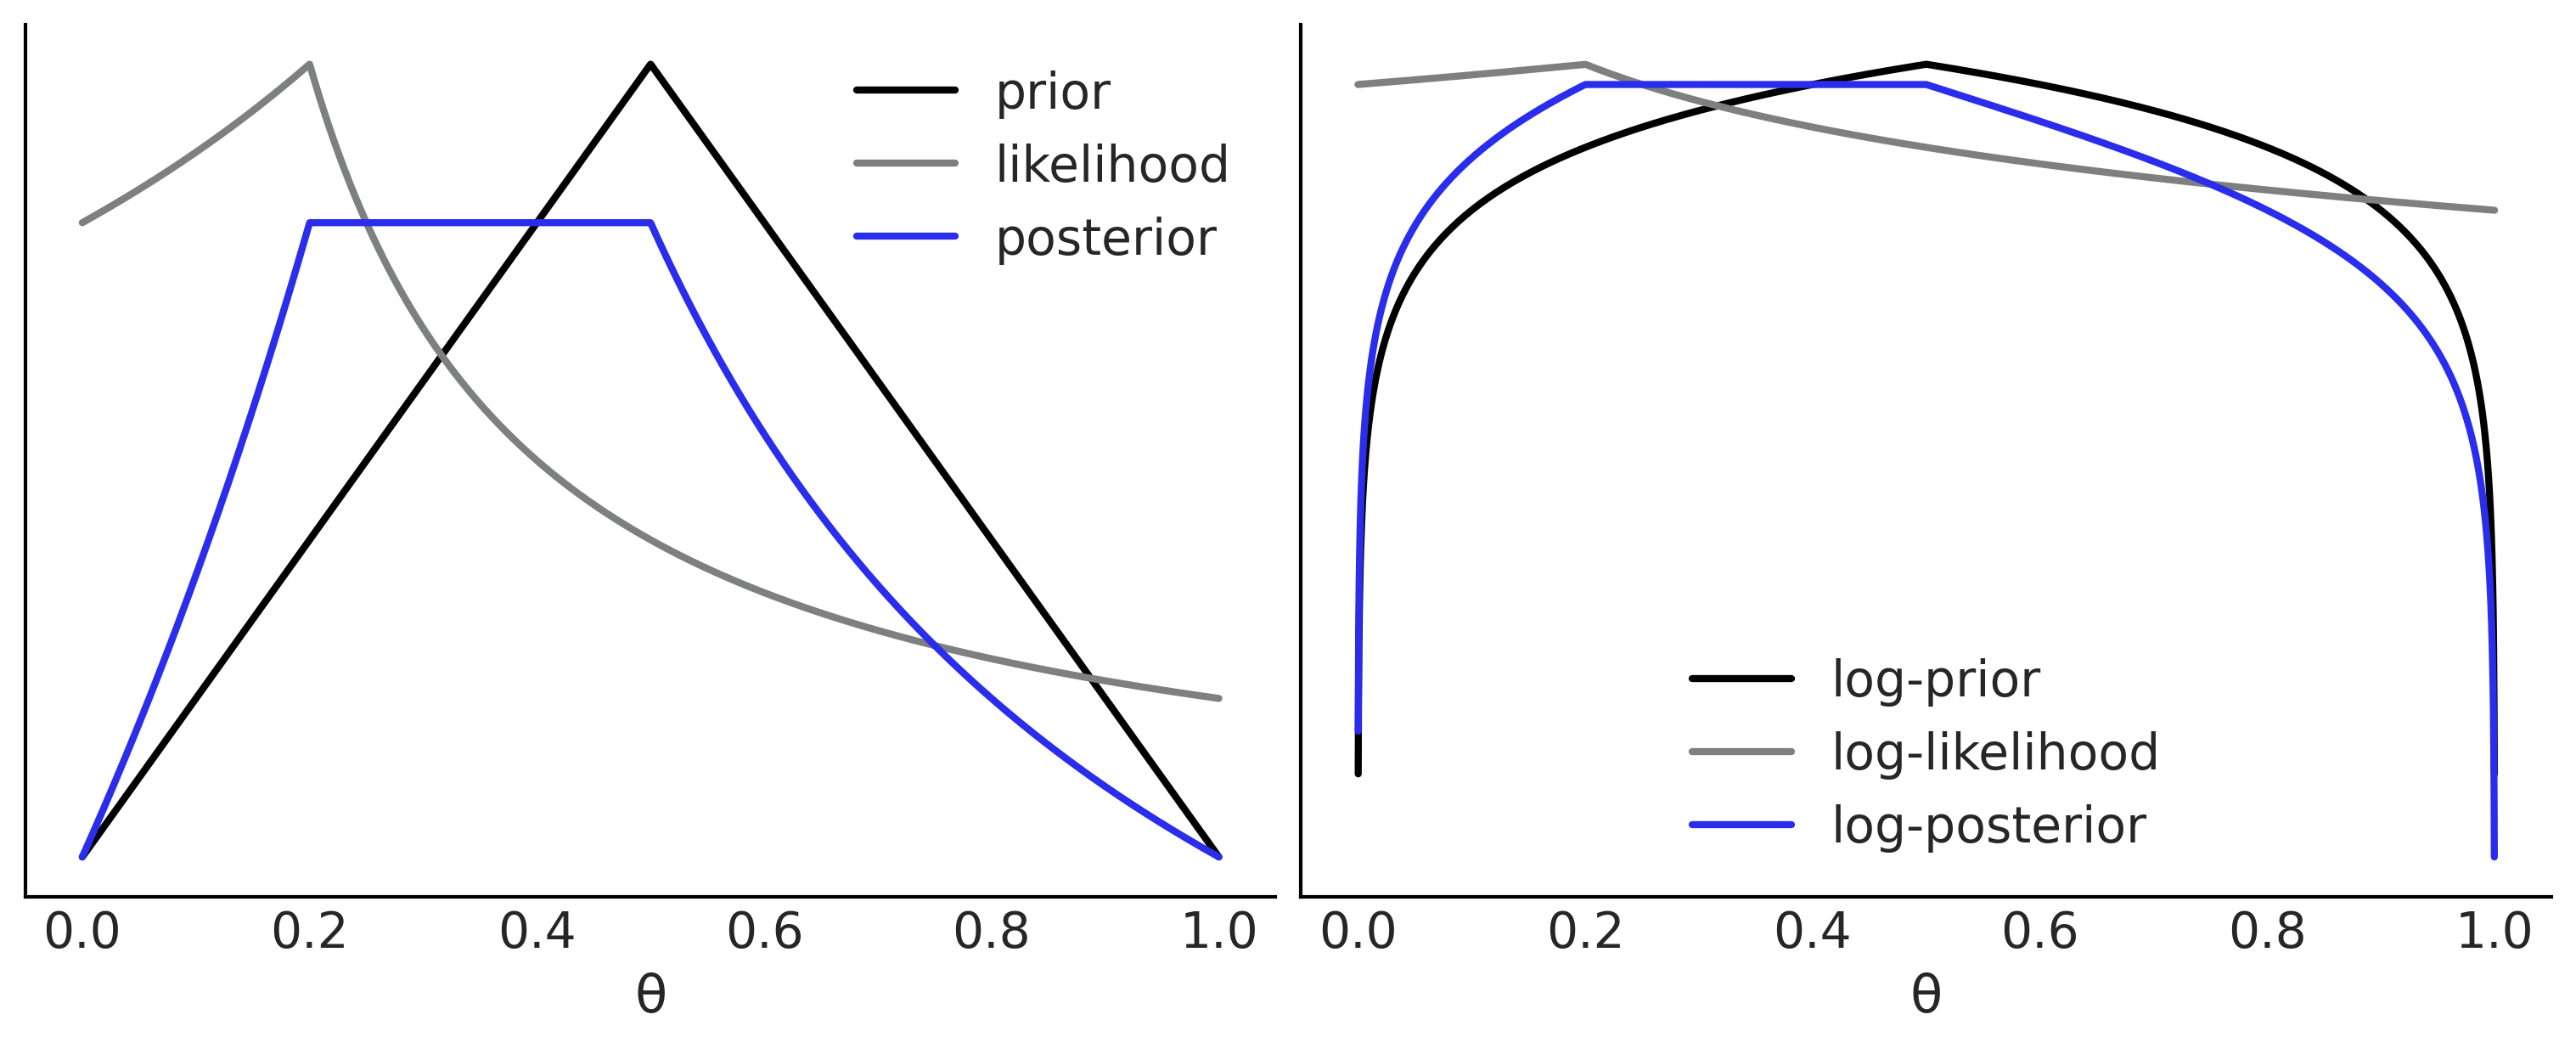

In [3]:
grid = np.linspace(0, 1, 5000)
prior = stats.triang.pdf(grid, 0.5)
likelihood = stats.triang.pdf(0.2, grid)
posterior = prior * likelihood
log_prior = np.log(prior)
log_likelihood = np.log(likelihood)
log_posterior = log_prior + log_likelihood


_, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(grid, prior, label="prior", lw=2)
ax[0].plot(grid, likelihood, label="likelihood", lw=2, color="C2")
ax[0].plot(grid, posterior, label="posterior", lw=2, color="C4")
ax[0].set_xlabel("θ")
ax[0].legend()
ax[0].set_yticks([])
import numba 

ax[1].plot(grid, log_prior, label="log-prior", lw=2)
ax[1].plot(grid, log_likelihood, label="log-likelihood", lw=2, color="C2")
ax[1].plot(grid, log_posterior, label="log-posterior", lw=2, color="C4")
ax[1].set_xlabel("θ")
ax[1].legend()
ax[1].set_yticks([])
plt.savefig("img/chp01/bayesian_triad.png")

(sampling_methods_intro)=

## 1.2 A DIY Sampler, Do Not Try This at Home

Closed form expressions for the integral in Equation
{eq}`eq:marginal_likelihood` are not always possible and thus much of
modern Bayesian inference is done using numerical methods that we call
**Universal Inference Engines** (see Section {ref}`inference_methods`) just to compensate for the
fact we live in the $21^\text{st}$ century and we still do not have flying cars.
Anyway, there are many well-tested Python libraries providing such
numerical methods so in general it is very unlikely that a Bayesian
practitioner will need to code their own Universal Inference Engine.

As of today there are generally only two good reasons to code your own
engine, you are either designing a new engine that improves on the old
ones, or you are learning how the current engines work. Since we are
learning in this chapter we will code one, but for the rest of the book
we are going to use engines available in Python libraries.

There are many algorithms that can be used as *Universal Inference
Engines*. Probably the most widely adopted and powerful is the family of
Markov chain Monte Carlo methods (MCMC). At a very high level, all MCMC
methods approximate the posterior distribution using samples. The
samples from the posterior distribution are generated by accepting or
rejecting samples from a different distribution called the proposal
distribution. By following certain rules [^8] and under certain
assumptions, we have theoretical guarantees that we will get samples
that are a good approximation of the posterior distribution. Thus, MCMC
methods are also known as samplers. All these methods require to be able
to evaluate the prior and likelihood at a given parameter value. That
is, even when we do not know what the entire posterior looks like, we
can ask for its density point-wise.

One such algorithm is Metropolis-Hastings
{cite:p}`Metropolis1953, Hastings1970, Rosenbluth2003`. This is not a very
modern or particularly efficient algorithm, but Metropolis-Hastings is
simple to understand and also provides a foundation to understand more
sophisticated and powerful methods. [^9]

The Metropolis-Hasting algorithm is defined as follows:

1.  Initialize the value of the parameter $\boldsymbol{X}$ at $x_i$

2.  Use a proposal distribution [^10] $q(x_{i + 1} \mid x_i)$ to
    generate a new value $x_{i + 1}$ from the old one $x_i$.

3.  Compute the probability of accepting the new value as:

    ```{math}
    :label: acceptance_prob
    p_a (x_{i + 1} \mid x_i) = \min \left (1, \frac{p(x_{i + 1}) \;
    q(x_i \mid x_{i + 1})} {p(x_i) \; q (x_{i + 1} \mid x_i)} \right)

    ```

4.  If $p_a > R$ where $R \sim \mathcal{U}(0, 1)$, save the new value,
    otherwise save the old one.

5.  Iterate 2 to 4 until a *sufficiently large* sample of values has
    been generated

The Metropolis algorithm is very general and can be used in non-Bayesian
applications but for what we care in this book, $p(x_i)$ is the
posterior's density evaluated at the parameter value $x_i$. Notice that
if $q$ is a symmetric distribution the terms $q(x_i \mid x_{i + 1})$ and
$q(x_{i + 1} \mid x_i)$ will cancel out (conceptually it means it is
equally likely are we are to go from $x_{i+1}$ to $x_i$ or to go from
$x_{i}$ to $x_{i+1}$), leaving just the ratio of the posterior evaluated
at two points. From Equation {eq}`acceptance_prob` we can see this
algorithm will always accept moving from a low probability region to a
higher one and will probabilistically accept moving from a high to low
probability region.

Another important remark is that the Metropolis-Hastings algorithm is
not an optimization method! We do not care about finding the parameter
value with the maximum probability, we want to *explore* the $p$
distribution (the posterior). This can be seen if we take note that once
at a maximum, the method can still move to a region of lower
probabilities in subsequent steps.

To make things more concrete let us try to solve the Beta-Binomial
model. This is probably the most common example in Bayesian statistics
and it is used to model binary, mutually-exclusive outcomes such as 0 or
1, positive or negative, head or tails, spam or ham, hotdog or not
hotdog, healthy or unhealthy, etc. More often than not Beta-Binomial
model is used as the first example to introduce the basics of Bayesian
statistics, because it is a simple model that we can solve and compute
with ease. In statistical notation we can write the Beta-Binomial models
as:

```{math}
:label: eq:beta_binomial

\begin{split}
    \theta \sim &\; \text{Beta}(\alpha, \beta) \\
    Y \sim &\; \text{Bin}(n=1, p=\theta)

\end{split}
```

In Equation {eq}`eq:beta_binomial` we are saying the parameter $\theta$
has $\text{Beta}(\alpha, \beta)$ as its prior distribution. And we
assume the data is distributed following a Binomial distribution
$\text{Bin}(n=1, p=\theta)$, which represents our likelihood
distribution. In this model the number of successes $\theta$ can
represent quantities like the proportion of heads or the proportion of
dying patients, sometimes statistics can be a very dark place. This
model has an analytical solution (see {ref}`conjugate_priors`) for the
details. For the sake of the example, let us assume we do not know how
to compute the posterior, and thus we will implement the
Metropolis-Hastings algorithm into Python code in order to get an
approximate answer. We will do it with the help of SciPy statistical
functions:

[^8]: See detailed balance at Sections {ref}`markov_chains` and {ref}`sec_metropolis_hastings`.

Listing 1.1 metropolis_hastings_sampler

In [4]:
def post(θ, Y, α=1, β=1):
    if 0 <= θ <= 1:
        prior = stats.beta(α, β).pdf(θ)
        like  = stats.bernoulli(θ).pmf(Y).prod()
        prop = like * prior
    else:
        prop = -np.inf
    return prop

We also need data, so we will generate some random fake data for this
purpose.

Listing 1.2 metropolis_hastings_sampler_rvs

In [5]:
Y = stats.bernoulli(0.7).rvs(20)

And finally we run our implementation of the Metropolis-Hastings
algorithm:

Listing 1.3 metropolis_hastings

In [6]:
n_iters = 1000
can_sd = 0.05
α = β =  1
θ = 0.5
trace = {'θ':np.zeros(n_iters)}
p2 = post(θ, Y, α, β)

for iter in range(n_iters):
    θ_can = stats.norm(θ, can_sd).rvs(1)
    p1 = post(θ_can, Y, α, β)
    pa = p1 / p2

    if pa > stats.uniform(0, 1).rvs(1):
        θ = θ_can
        p2 = p1

    trace['θ'][iter] = θ

At line 9 of Code Block [metropolis_hastings](metropolis_hastings) we generate a proposal
distribution by sampling from a Normal distribution with standard
deviation `can_sd`. At line 10 we evaluate the posterior at the new
generated value `θ_can` and at line 11 we compute the probability of
acceptance. At line 17 we save a value of `θ` in the `trace` array.
Whether this value is a new one or we repeat the previous one, it will
depend on the result of the comparison at line 13.

::: {admonition} Ambiguous MCMC jargon

When we use Markov chain Monte Carlo Methods to do Bayesian inference,
we typically refer to them as MCMC samplers. At each iteration we draw a
random sample from the sampler, so naturally we refer to the output from
MCMC as *samples* or *draws*. Some people make the distinction that a
sample is made up by a collection of draws, others treat samples and
draws as interchangeably.

Since MCMC draws samples sequentially we also say we get a *chain* of
draws as result, or just MCMC chain for short. Usually it is desired to
draw many chains for computational and diagnostic reasons (we discuss
how to do this in Chapter [2](chap1bis)). All the output
chains, whether singular or plural, are typically referred to as a trace
or simply the posterior. Unfortunately spoken language is imprecise so
if precision is needed the best approach is to review the code to
understand exactly what is happening.
:::

Note that the code implemented in Code Block [metropolis_hastings](metropolis_hastings) is
not intended to be efficient, in fact there are many changes that would
be present in production-grade code, like computing the probabilities on
the log scale to avoid under/overflow issues (see Section {ref}`log_probabilities`), or pre-computing the
proposal and the Uniform values. This is where the purity of math needs
to be adjusted to meet the reality of computers, and why building these
engines is best left to experts. Similarly, the value of `can_sd`, is a
parameter of the Metropolis-Hastings algorithm, not a parameter from the
Bayesian model. In theory this parameter should not affect the correct
behavior of the algorithm, but in practice it is very important as the
efficiency of the method will certainly be affected by its value (see Section 
{ref}`inference_methods` for an in-depth discussion).

Returning to our example, now that we have our MCMC samples we want to
understand *what it looks like*. A common way to inspect the results of
a Bayesian inference is to plot the sampled values per iteration
together with a histogram, or other visual tool, to represent
distributions. For example, we can use the code in Code Block
[diy_trace_plot](diy_trace_plot) to plot
{numref}`fig:traceplot` [^11]:

[^9]: For a more extensive discussion about inference methods you should
    read Section [{ref}`inference_methods` and references
    therein.

[^10]: This is sometimes referred to as a kernel in other Universal
    Inference Engines.

[^11]: You can use ArviZ `plot_trace` function to get a similar plot.
    This is how we will do in the rest of the book.

Listing 1.4 diy_trace_plot

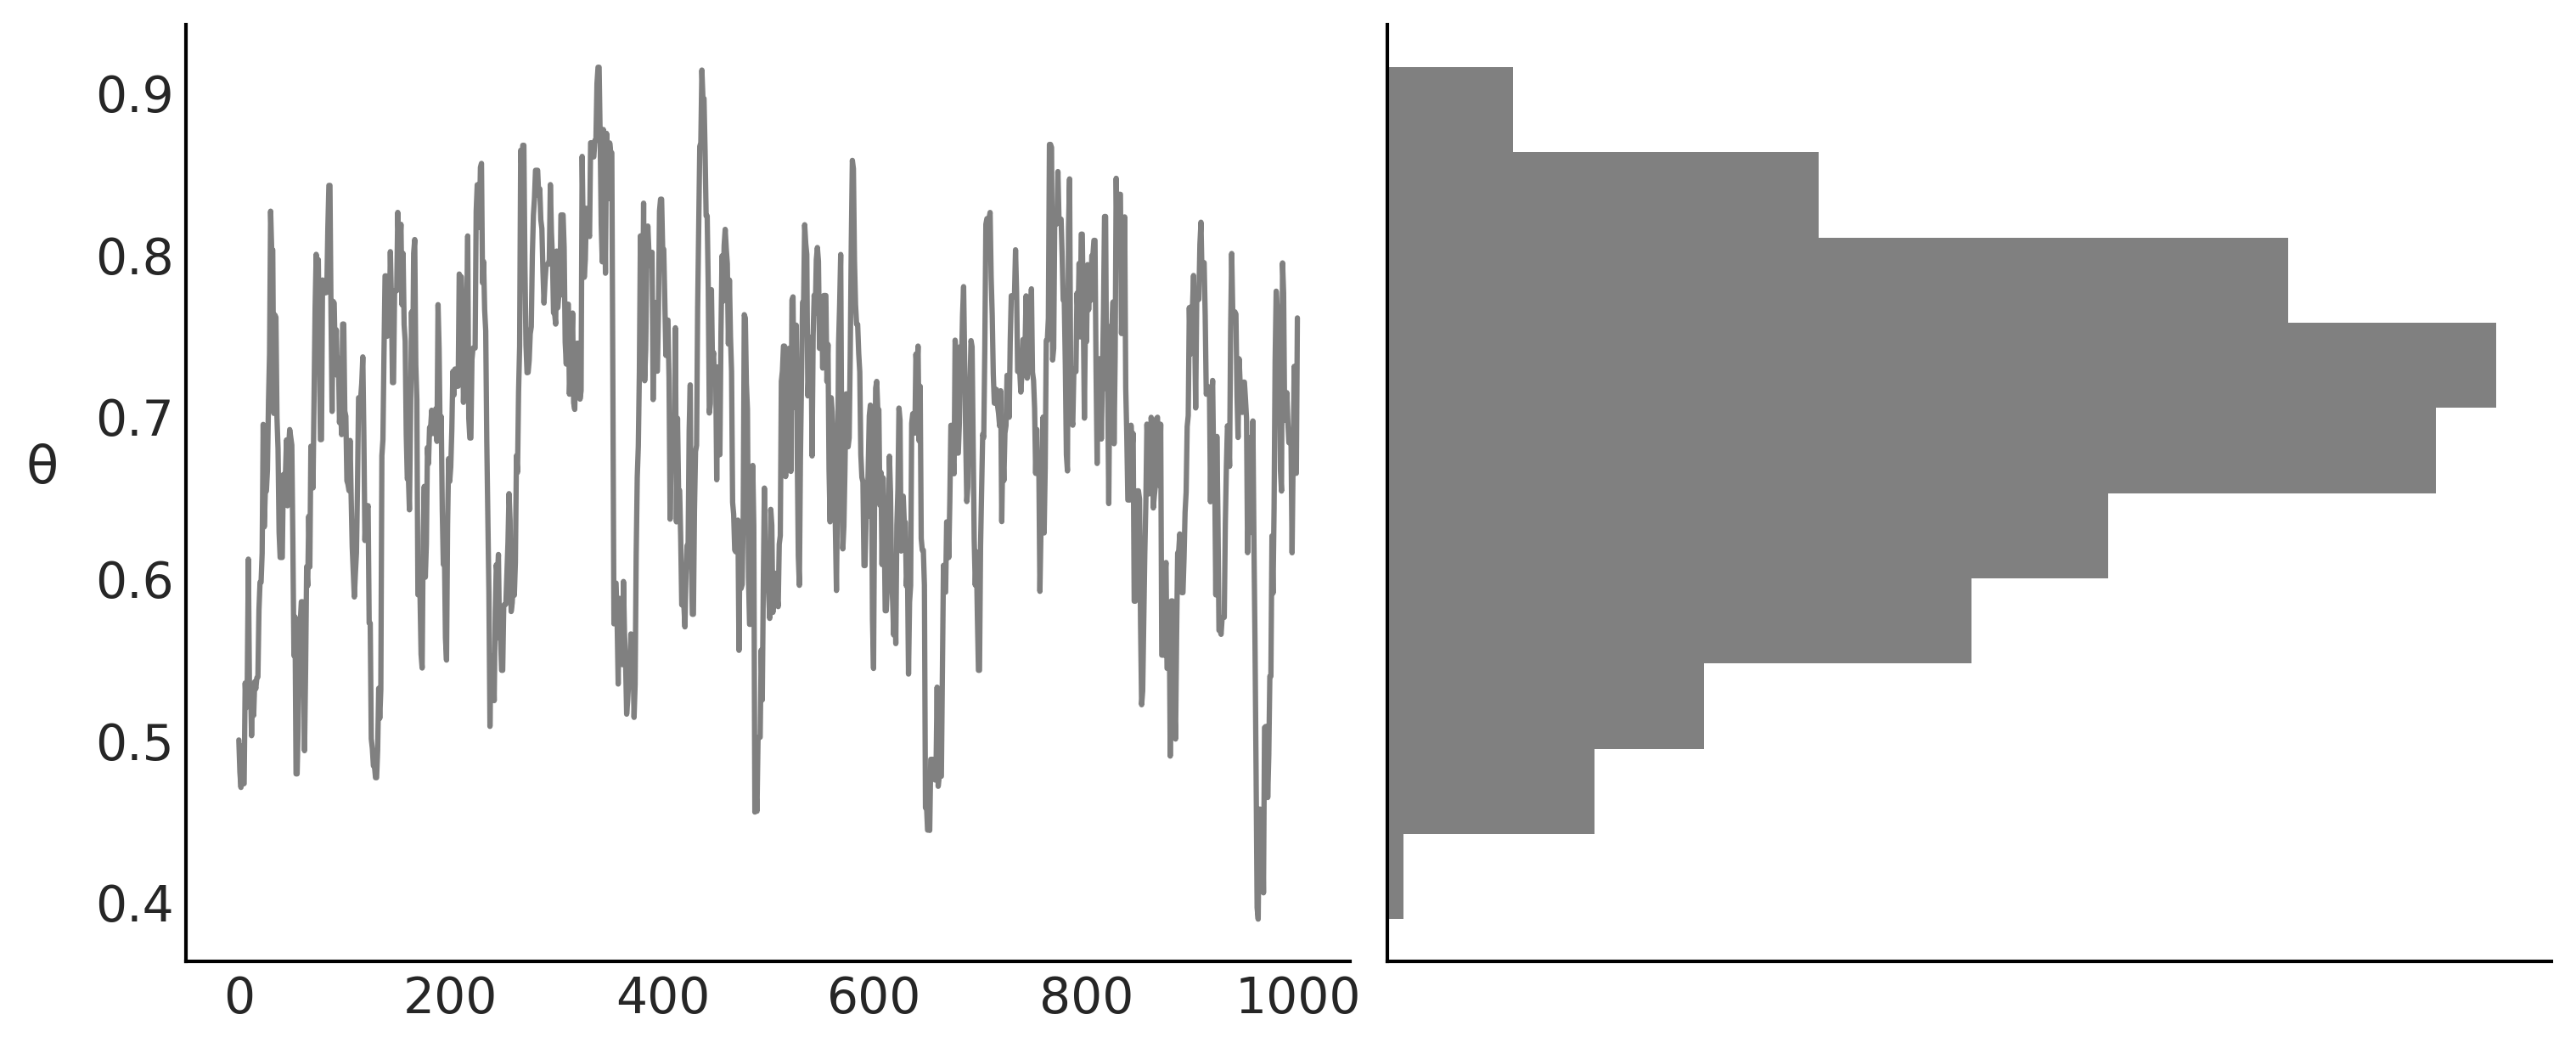

In [7]:
_, axes = plt.subplots(1,2, figsize=(10, 4), constrained_layout=True, sharey=True)
axes[1].hist(trace['θ'], color='0.5', orientation="horizontal", density=True)
axes[1].set_xticks([])
axes[0].plot(trace['θ'], '0.5')
axes[0].set_ylabel('θ', rotation=0, labelpad=15)
plt.savefig("img/chp01/traceplot.png")

```{figure} figures/traceplot.png
:name: fig:traceplot
:width: 8.00in
On the left, we have the sampled values of the parameter $\theta$ at
each iteration. On the right, we have the histogram of the sampled
values of $\theta$. The histogram is rotated, to make it easier to see
that both plots are closely related. The plot on the left shows the
*sequence* of sampled values. This sequence is our Markov Chain. The
plot on the right shows the distribution of the sampled values.
```

Generally it is also useful to compute some numerical summaries. Here we
will use the Python package ArviZ {cite:p}`Kumar2019` to compute these
statistics:

In [8]:
az.summary(trace, kind='stats', round_to=2)

,mean,sd,hdi_3%,hdi_97%
θ,0.69,0.1,0.51,0.87


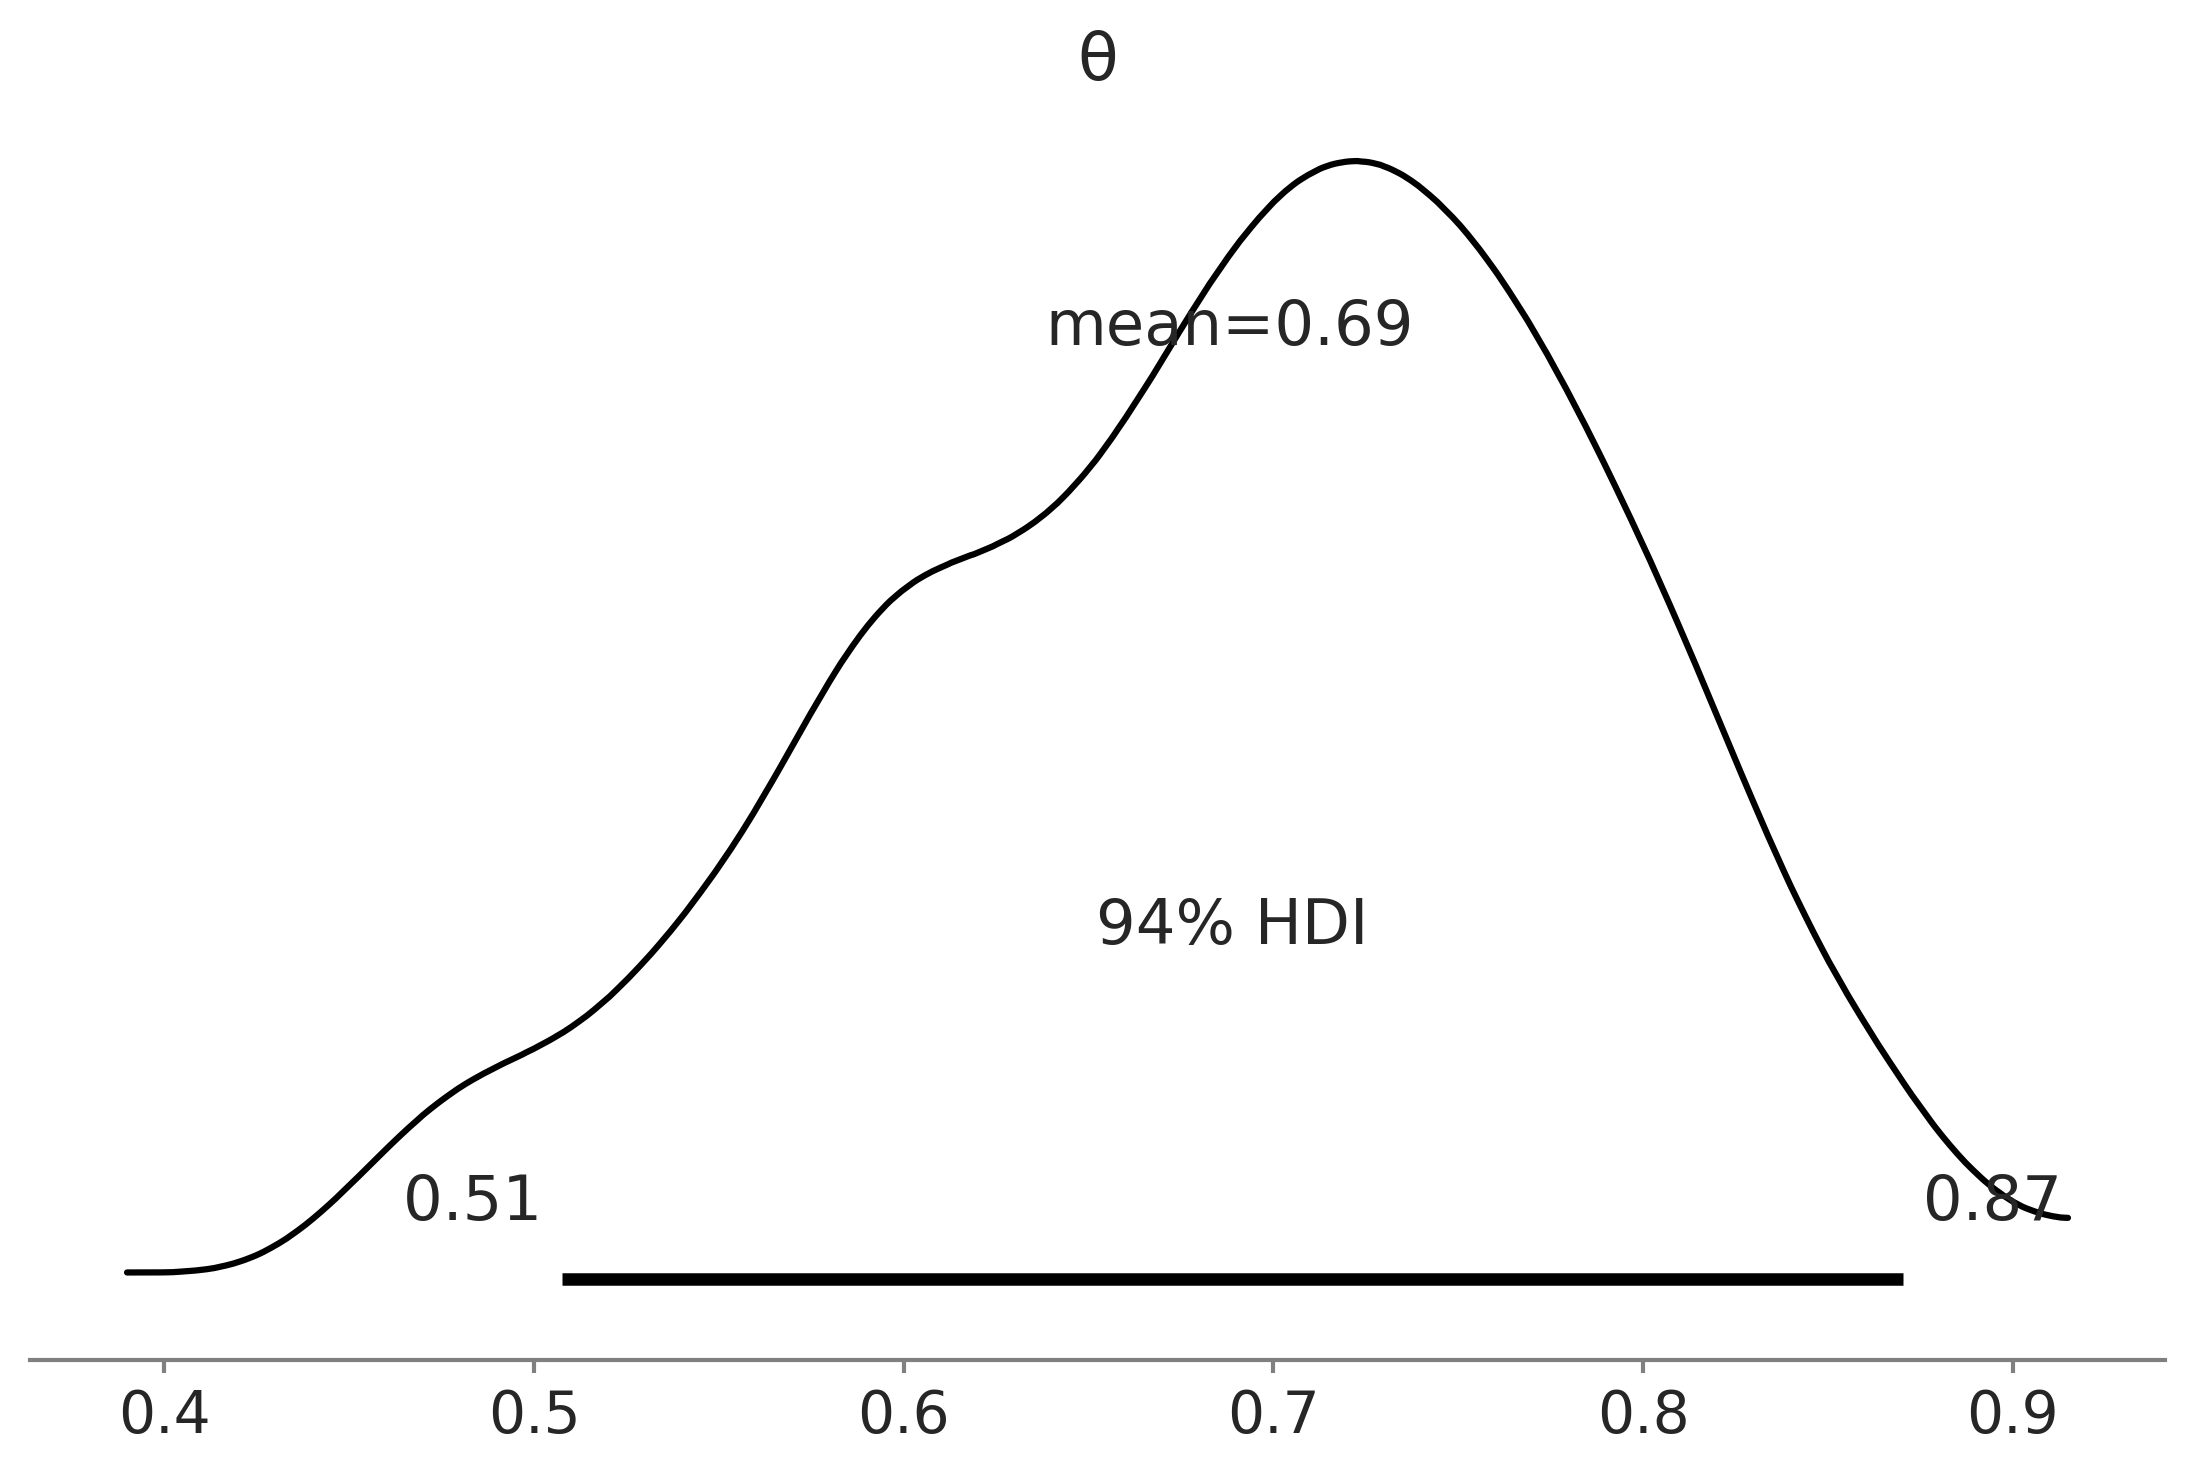

In [9]:
az.plot_posterior(trace)
plt.savefig("img/chp01/plot_posterior.png")

```{list-table} Posterior summary
:name: tab:posterior_summary
* -
  - **mean**
  - **sd**
  - **hdi_3%**
  - **hdi_97%**
* - $\theta$
  - 0.69
  - 0.01
  - 0.52
  - 0.87
```


ArviZ's function `summary` computes the mean, standard deviation and the
highest density interval (HDI) 94% of our parameter $\theta$. The HDI is
the shortest interval containing a given probability density, 94% for
this particular example [^12]. {numref}`fig:plot_posterior`, generated
with `az.plot_posterior(trace)` is a close visual equivalent of the
above summary in {numref}`tab:posterior_summary`. We
can see the mean and the HDI, on top of a curve representing the entire
posterior distribution. The curve is computed using a **kernel density
estimator (KDE)**, which is like the smooth version of a histogram.
ArviZ uses KDEs in many of its plots, and even internally for a few
computations.

```{figure} figures/plot_posterior.png
:name: fig:plot_posterior
:width: 4in
Posterior plot visualizing the samples generated from Code Block
[metropolis_hastings](metropolis_hastings). The posterior distribution is represented using
a KDE, the mean and the limits of the HDI 94% are represented in the
figure.
```

The HDI is a common choice in Bayesian statistics and *round* values
like 50% or 95% are commonplace. But ArviZ uses 94% (or 0.94) as the
default value as seen in both the summary
{numref}`tab:posterior_summary` and
{numref}`fig:plot_posterior`. The reason for this choice is that 94 is
close to the *widely used* 95 but is different enough to serve as a
friendly reminder that there is nothing special about these *round*
values {cite:p}`mcelreath_2020`. Ideally you should choose a value that fits
your needs {cite:p}`Lakens2018`, or at least acknowledge that you are using a
default.

[^12]: Notice that in principle the number of possible intervals
    containing a given proportion of the total density is infinite.

(Automating_inference)=

## 1.3 Say Yes to Automating Inference, Say No to Automated Model Building

Instead of writing our own sampler and having to define our models using
`scipy.stats` method we can leverage the aid of **Probabilistic
Programming Languages** (PPL). These tools allow users to express
Bayesian models using code and then perform Bayesian inference in a
fairly automated fashion thanks to Universal Inference Engines. In short
PPLs help practitioners focus more on model building and less on the
mathematical and computational details. The availability of such tools
has helped increase the popularity and usefulness of Bayesian methods in
the last few decades. Unfortunately, these Universal Inference Engines
methods are not really that universal, as they will not be able to
efficiently solve every Bayesian model (but we still like the cool
name!). Part of the job of the modern Bayesian practitioner is being
able to understand and work around these limitations.

In this book we will use PyMC {cite:p}`Salvatier2016` and TensorFlow
Probability {cite:p}`dillon2017tensorflow`. Let us write the model from
Equation {eq}`eq:beta_binomial` using PyMC:

Listing 1.5 beta_binom <a id="beta_binom"></a>

In [10]:
# <a id="beta_binom"></a>
# Declare a model in PyMC
with pm.Model() as model:
    # Specify the prior distribution of unknown parameter
    θ = pm.Beta("θ", alpha=1, beta=1)

    # Specify the likelihood distribution and condition on the observed data
    y_obs = pm.Binomial("y_obs", n=1, p=θ, observed=Y)

    # Sample from the posterior distribution
    idata = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 40 seconds.


You should check by yourself that this piece of code provides
essentially the same answer as our DIY sampler we used before, but with
much less effort. If you are not familiar with the syntax of PyMC3, just
focus on the intent of each line as shown in the code comments for now.
Since we have defined our model in PyMC3 syntax we can also utilize
`pm.model_to_graphviz(model)` to generate a graphical representation of
the model in Code Block [beta_binom](beta_binom) (see
{numref}`fig:BetaBinomModelGraphViz`).

```{figure} figures/BetaBinomModelGraphViz.png
:name: fig:BetaBinomModelGraphViz
:width: 2in
A graphical representation of the model defined in Equation
{eq}`eq:beta_binomial` and Code Block
[beta_binom](beta_binom). The ovals represent our prior
and likelihood, whereas the 20 in this case indicates the number of
observations.
[fig:BetaBinomModelGraphViz]{#fig:BetaBinomModelGraphViz
label="fig:BetaBinomModelGraphViz"}
```

A Probabilistic Programming Language can not only evaluate the
log-probability of the random variables to get the posterior
distribution, but also simulate from various distributions as well. For
example, Code Block
[predictive_distributions](predictive_distributions) shows
how to use PyMC3 to generate 1000 samples from the prior predictive
distribution and 1000 samples from the posterior predictive
distribution. Notice how for the first one, we have a function taking
the `model` as argument while for the second function we have to pass
both `model` and `trace`, reflecting the fact that the prior predictive
distribution can be computed just from the model while the posterior
predictive distribution we need a model and posterior. The generated
samples from the prior and posterior predictive distributions are
represented in the top and bottom panel, respectively, from
{numref}`fig:quartet`.

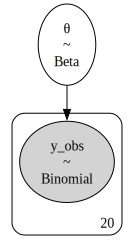

In [11]:
graphviz = pm.model_to_graphviz(model)
graphviz

In [12]:
graphviz.graph_attr.update(dpi="300")
graphviz.render("img/chp01/BetaBinomModelGraphViz", format="png")

'img\\chp01\\BetaBinomModelGraphViz.png'

Listing 1.6 predictive_distributions

In [13]:
pred_dists = (pm.sample_prior_predictive(1000, model).prior_predictive["y_obs"].values,
              pm.sample_posterior_predictive(idata, model).posterior_predictive["y_obs"].values)

Sampling: [y_obs, θ]
Sampling: [y_obs]


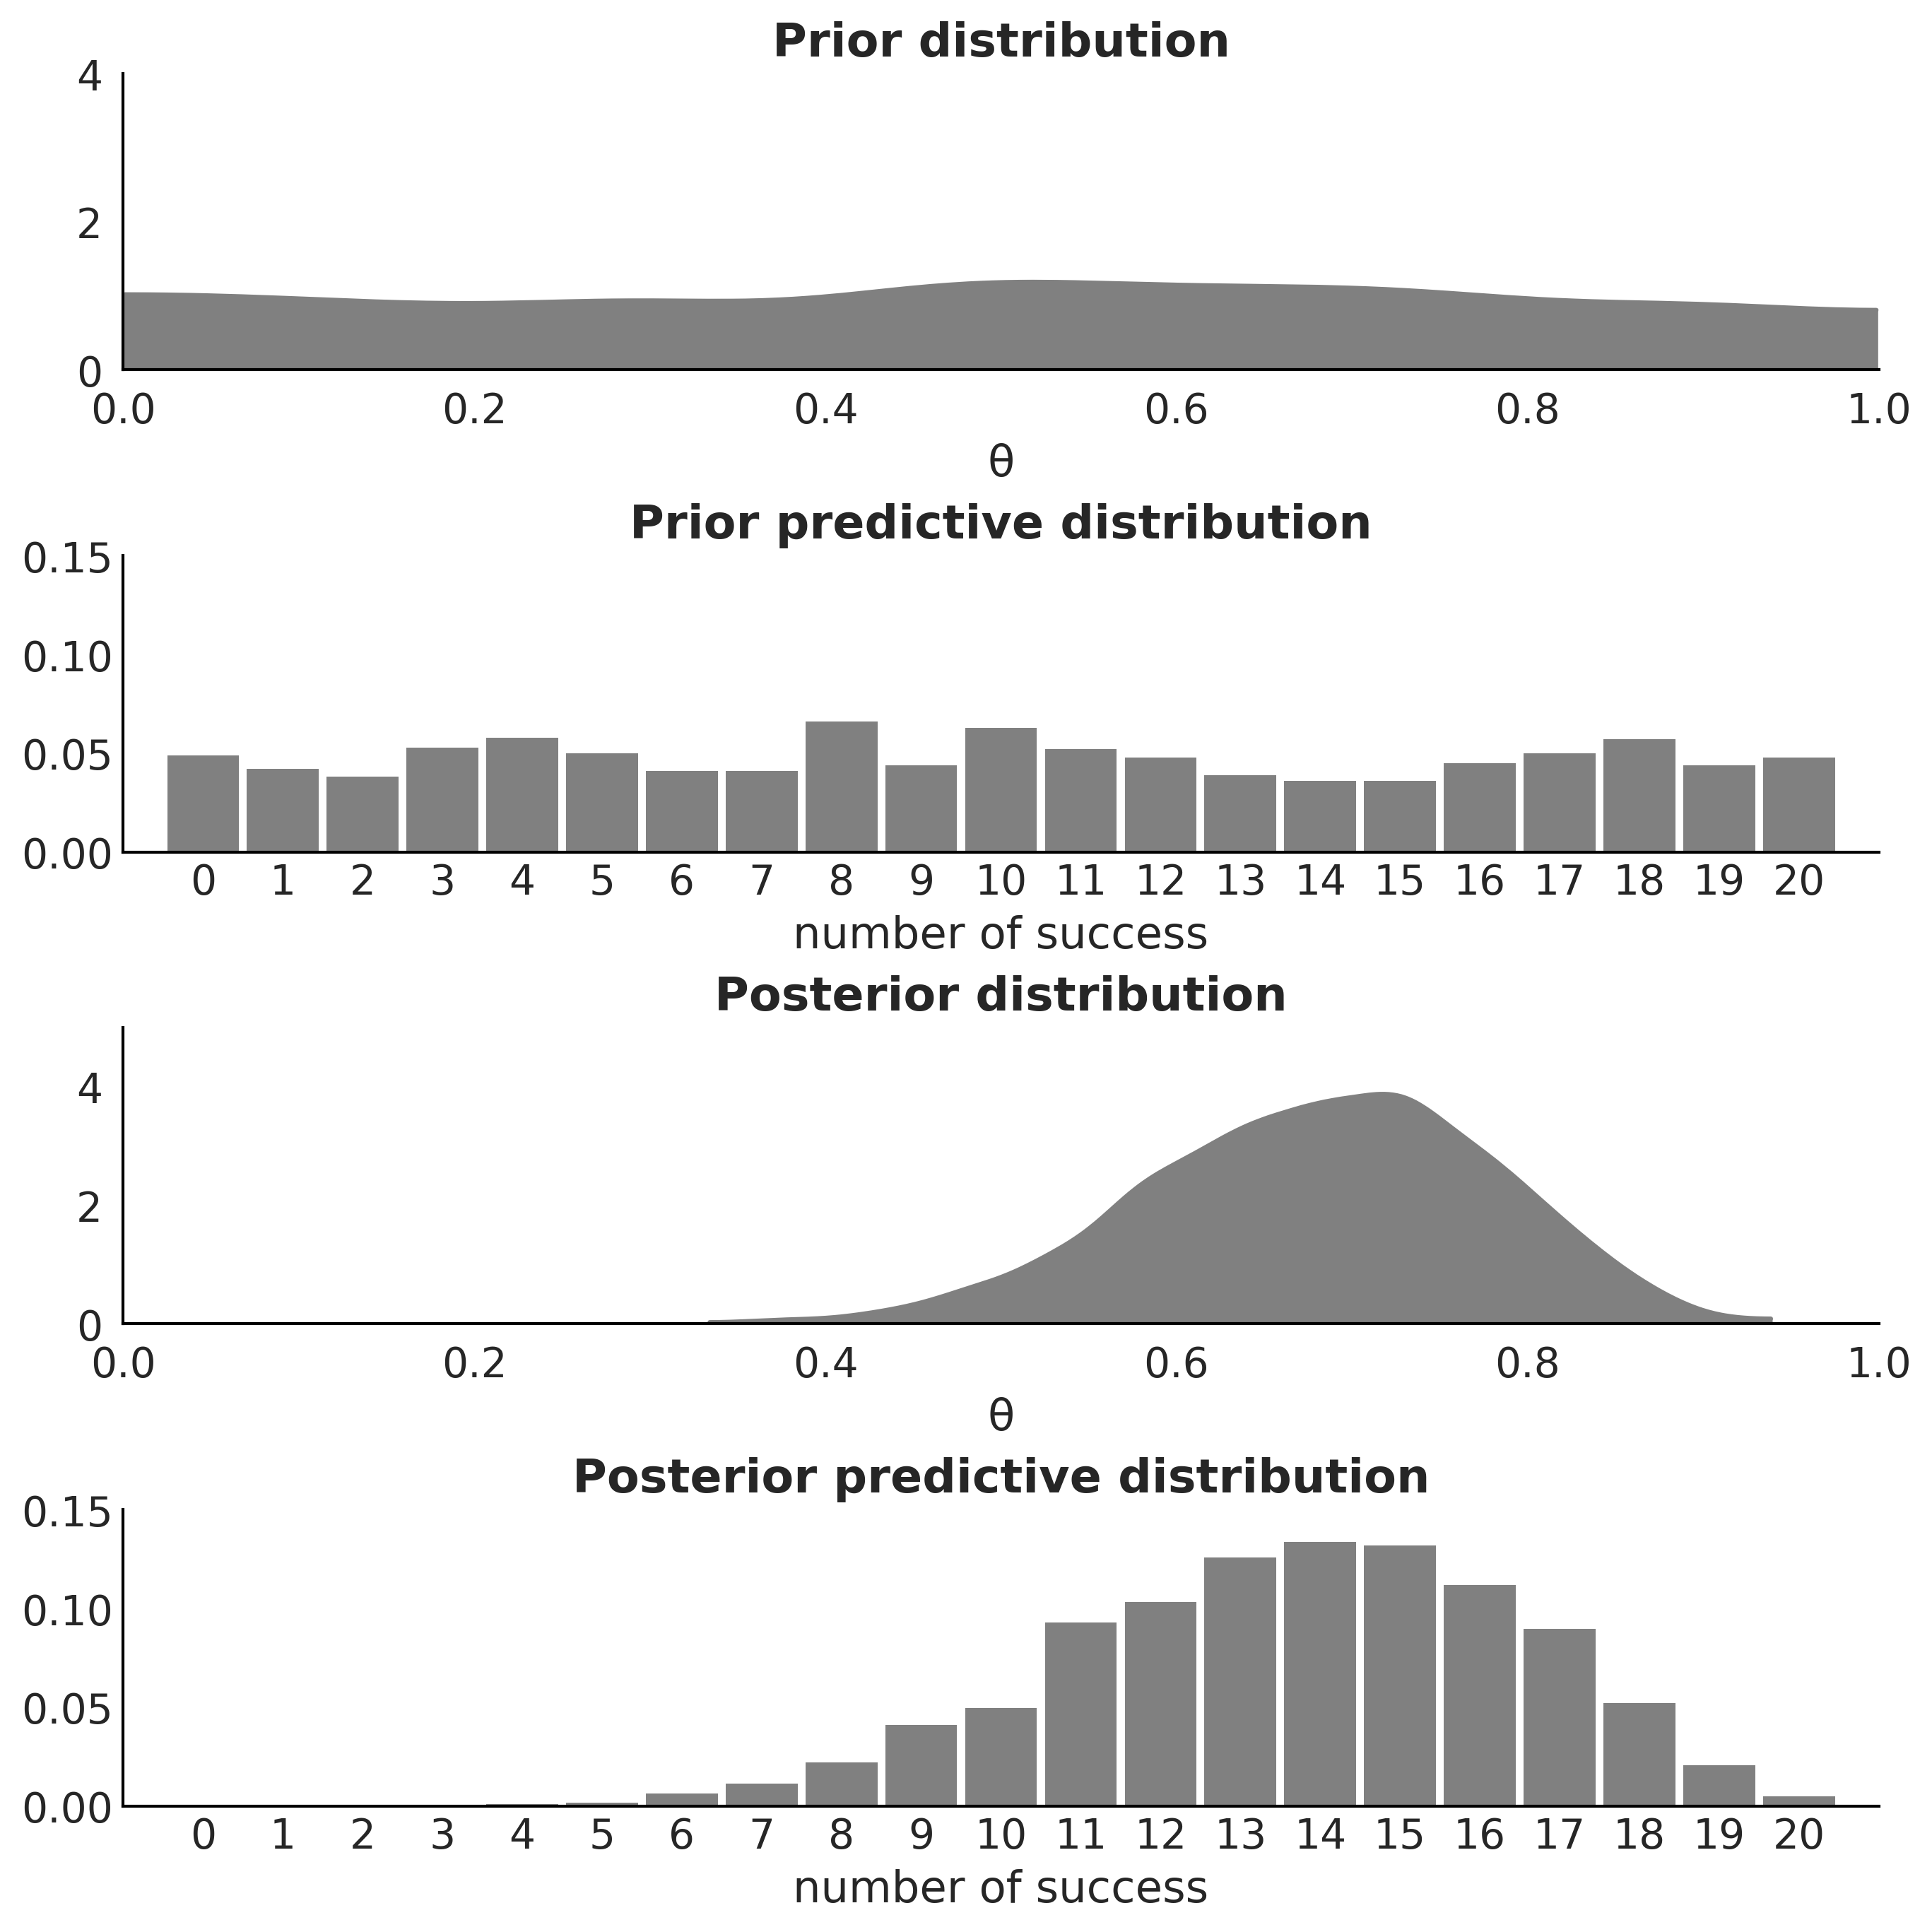

In [14]:
fig, axes = plt.subplots(4, 1, figsize=(9, 9))

for idx, n_d, dist in zip((1, 3), ("Prior", "Posterior"), pred_dists):
    az.plot_dist(dist.sum(-1), 
                 hist_kwargs={"color":"0.5", "bins":range(0, 22)},
                 ax=axes[idx])
    axes[idx].set_title(f"{n_d} predictive distribution", fontweight='bold')
    axes[idx].set_xlim(-1, 21)
    axes[idx].set_ylim(0, 0.15)
    axes[idx].set_xlabel("number of success")

az.plot_dist(pm.draw(θ, 1000), plot_kwargs={"color":"0.5"},
             fill_kwargs={'alpha':1}, ax=axes[0])
axes[0].set_title("Prior distribution", fontweight='bold')
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 4)
axes[0].tick_params(axis='both', pad=7)
axes[0].set_xlabel("θ")

az.plot_dist(idata.posterior["θ"], plot_kwargs={"color":"0.5"},
             fill_kwargs={'alpha':1}, ax=axes[2])
axes[2].set_title("Posterior distribution", fontweight='bold')
axes[2].set_xlim(0, 1)
axes[2].set_ylim(0, 5)
axes[2].tick_params(axis='both', pad=7)
axes[2].set_xlabel("θ")

plt.savefig("img/chp01/Bayesian_quartet_distributions.png")

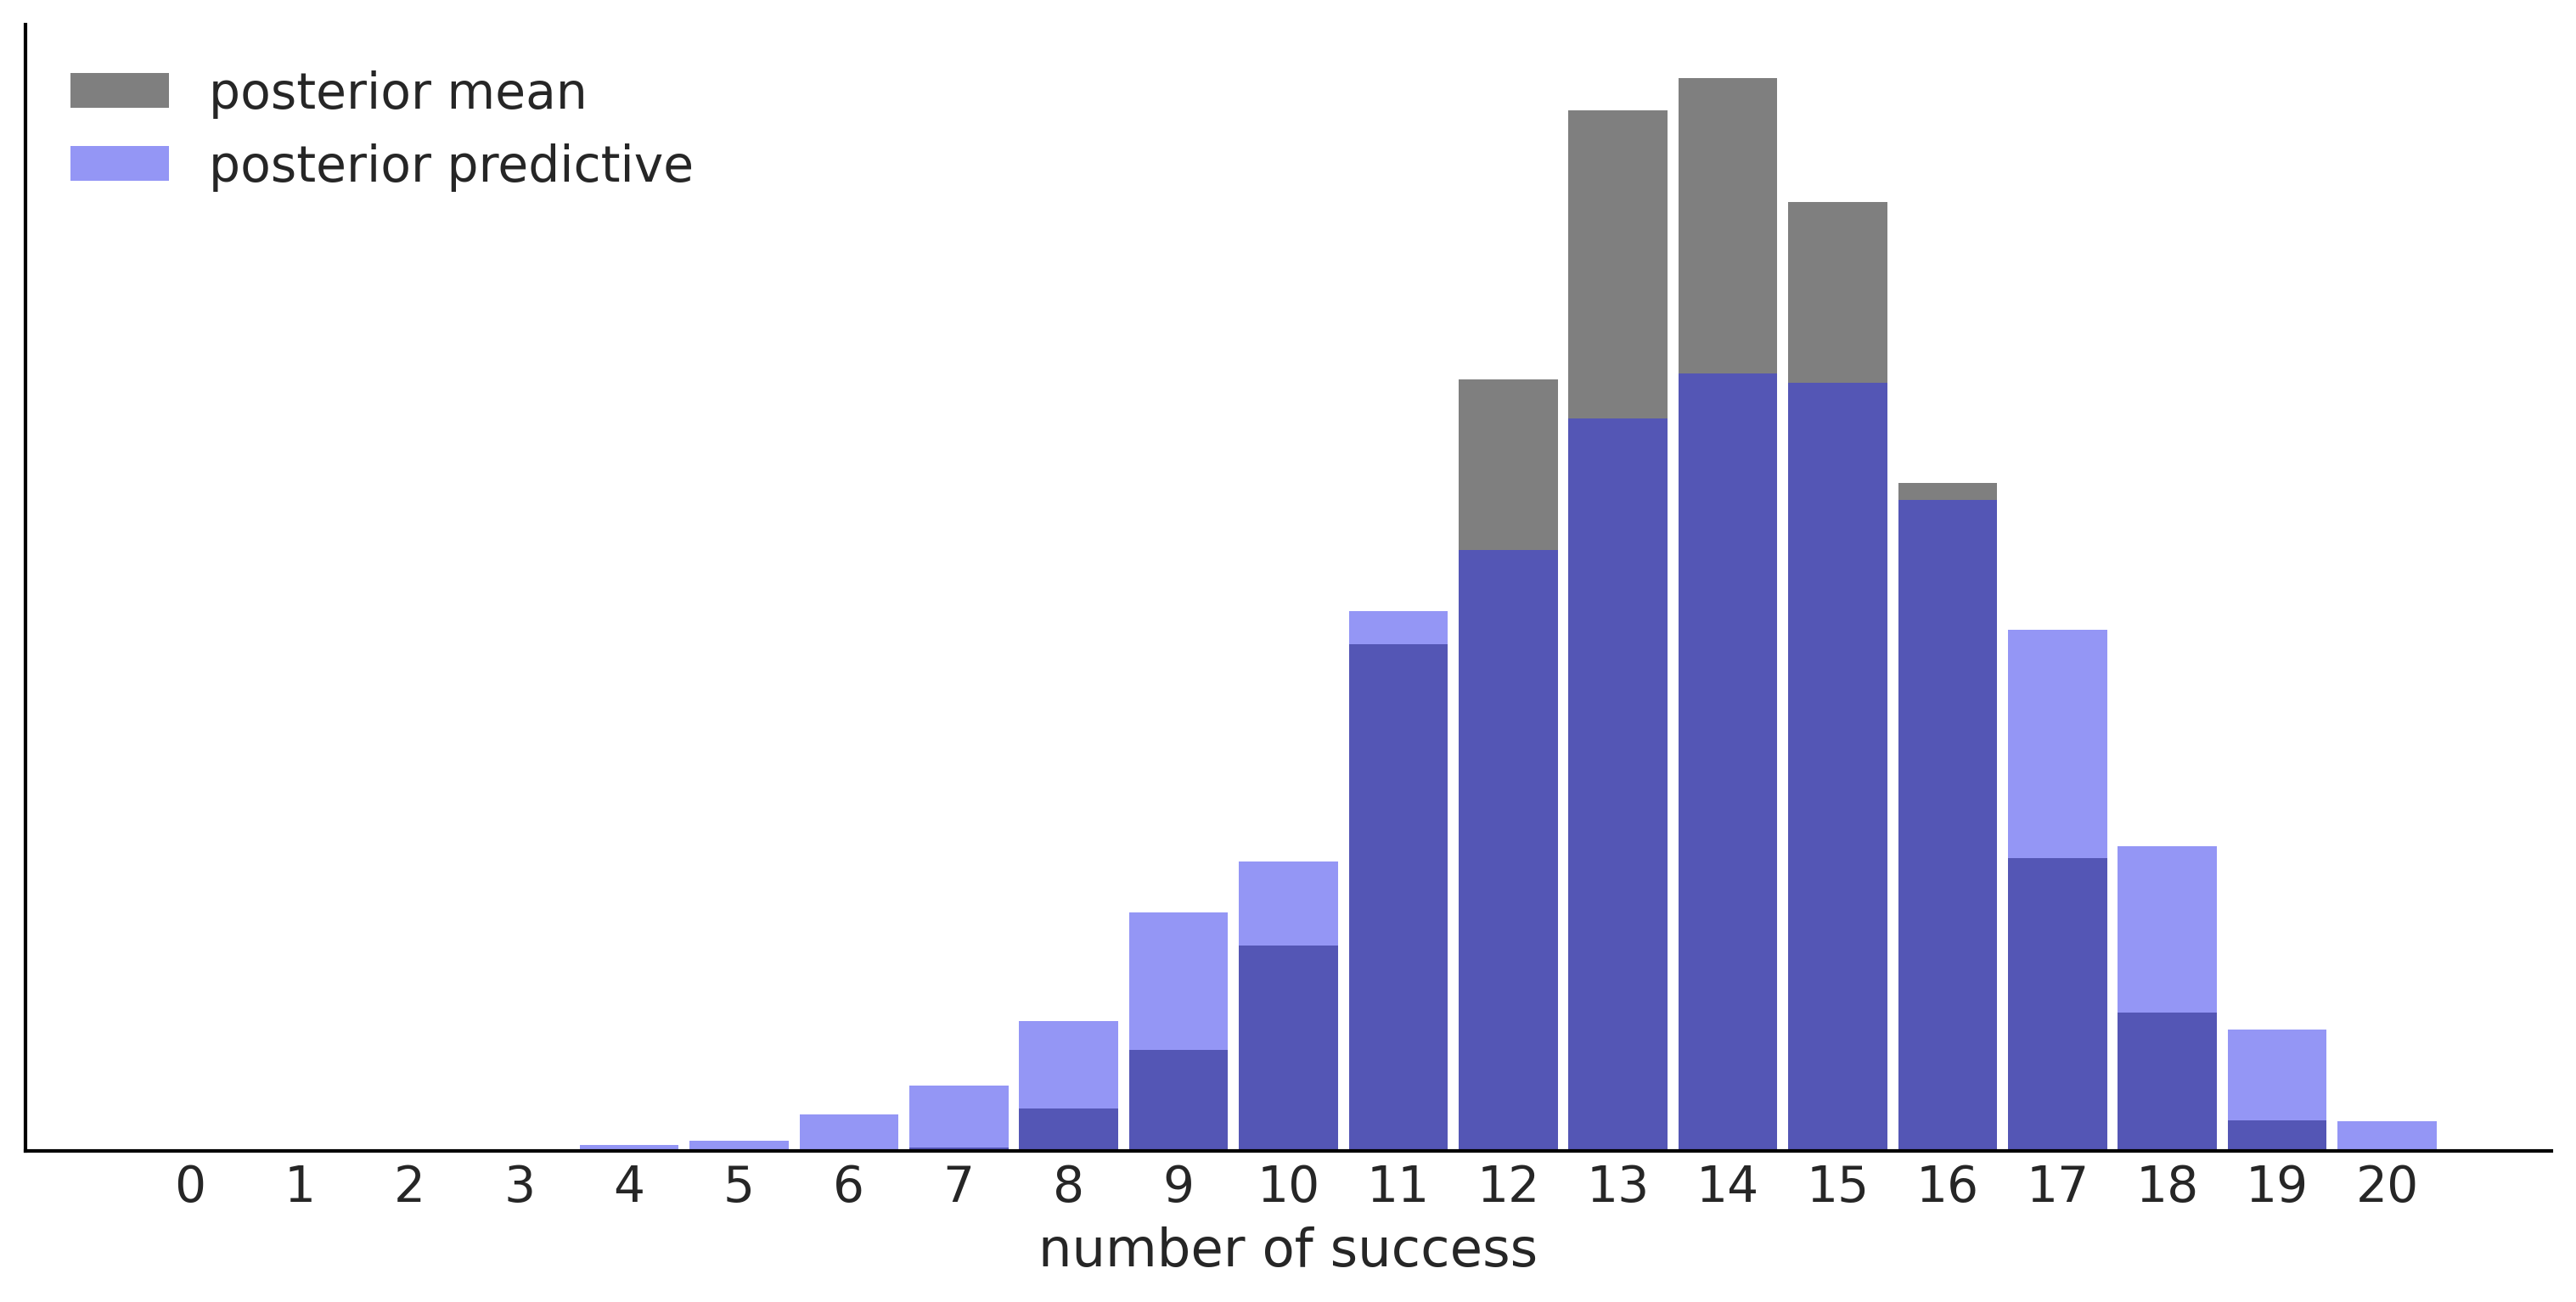

In [15]:
predictions = (stats.binom(n=1, p=idata.posterior["θ"].mean()).rvs((4000, len(Y))),
               pred_dists[1])

for d, c, l in zip(predictions, ("C0", "C4"), ("posterior mean", "posterior predictive")):
    ax = az.plot_dist(d.sum(-1),
                      label=l,
                      figsize=(10, 5),
                      hist_kwargs={"alpha": 0.5, "color":c, "bins":range(0, 22)})
    ax.set_yticks([])
    ax.set_xlabel("number of success")
plt.savefig("img/chp01/predictions_distributions.png")

Equations {eq}`eq:posterior_dist`, {eq}`eq:prior_pred_dist`, and
{eq}`eq:post_pred_dist` clearly define the posterior, the prior
predictive, and the posterior predictive distributions as different
mathematical objects. The two later are distributions over data and the
first one is a distribution over the parameters in a model.
{numref}`fig:quartet` helps us visualize this difference and also
includes the prior distribution for completeness.

::: {admonition} Expressing models in multiple ways

There are numerous methods to communicate the architecture of statistical models. These can be, in no
particular order:

-   Spoken and written language

-   Conceptual diagrams: {numref}`fig:BetaBinomModelGraphViz`.

-   Mathematical notation: Equation {eq}`eq:beta_binomial`

-   Computer Code: Code Block [beta_binom](beta_binom)

For a modern Bayesian practitioner it is useful to be literate across
all these mediums. They are formats you see presented in talks,
scientific papers, hand sketches when discussing with colleagues, code
examples on the internet, etc. With fluency across these mediums you
will be better able to understand concepts presented one way, and then
apply them in another way. For example, read paper and then implement a
model, or hear about a technique in a talk and then be able to write a
blog post on it. For you personally fluency will likely speed up your
learning and increase your ability to communicate with others.
Ultimately this helps achieve what general statistics community always
strives for a better shared understanding of the world.
:::

```{figure} figures/Bayesian_quartet_distributions.png
:name: fig:quartet
:width: 8.00in
From top plot to bottom plot we show: (1) samples from the prior
distribution of the parameter $\theta$; (2) samples from the prior
predictive distribution, where we are plotting the probability
distribution of the total number of successes; (3) posterior samples of
the parameter $\theta$; (4) posterior predictive distribution of the
total number of successes. The x-axis and y-axis scales are shared
between the first and third plots and then between the second and fourth
plots.
```

As we already mentioned, posterior predictive distributions take into
account the uncertainty about our estimates.
{numref}`fig:predictions_distributions` shows that the predictions using
the mean are less spread than predictions from the posterior predictive
distribution. This result is not only valid for the mean, we would get a
similar picture if we change the mean to any other point-estimate.

```{figure} figures/predictions_distributions.png
:name: fig:predictions_distributions
:width: 8.00in
Predictions for the Beta-Binomial model, using the posterior mean (gray
histogram) vs predictions using the entire posterior, i.e. the posterior
predictive distribution (blue histogram).
```

(make_prior_count)=

## 1.4 A Few Options to Quantify Your Prior Information

Having to choose a prior distribution is portrayed both as a burden and
as a blessing. We choose to affirm that is a necessity, if you are not
choosing your priors someone else is doing it for you. Letting others
decide for you is not always a bad thing. Many of these non-Bayesian
methods can be very useful and efficient if applied in the correct
context, and with awareness of their limitations. However, we firmly
believe there is an advantage for the practitioner in knowing the model
assumptions and have the flexibility to alter them. Priors are just one
form of assumption.

We also understand that prior elicitation can be a source of doubts,
anxiety, and even frustration for many practitioners, especially for,
but not necessarily only for, newcomers. Asking what is the best-ever
prior for a given problem, is a common and totally valid question. But
it is difficult to give a straight satisfying answer other than, there
is no such thing. At best there are some useful defaults that we can use
as starting points in an iterative modeling workflow.

In this section we discuss a few general approaches for selecting prior
distributions. This discussion follows more or less an *informativeness
gradient* from "blank slates\" which include no information, to highly
informative, which put as much information as possible into the priors.
As with the other sections in this chapter, this discussion is more on
the theoretical side. In the following chapters we will discuss how to
choose priors in more practical settings.

(conjugate_priors)=

### 1.4.1 Conjugate Priors

A prior is conjugate to a likelihood if the posterior belongs to the
same family of distributions as the prior. For example, if the
likelihood is Poisson and the prior Gamma, then the posterior will also
be a Gamma distribution [^13].

From a purely mathematical perspective, **conjugate priors** are the
most convenient choice as they allow us to calculate the posterior
distribution analytically with "pen and paper\", no complex computation
required [^14]. From a modern computational perspective, conjugate
priors are generally not better than alternatives, the main reason being
that modern computational methods allow us to perform inference with
virtually any choice of priors and not just those that are
mathematically convenient. Nevertheless, conjugate priors can be useful
when learning Bayesian inference and also under some situations when
there is a need to use analytical expressions for the posterior (see Section
{ref}`conjugate_case_study` for an example). As is
such, we will briefly discuss analytical priors using the Beta Binomial
model.

As the name suggests, the conjugate prior for the binomial distribution
is the Beta distribution:

```{math}
:label: eq:beta_distribution
p(\theta \mid Y) \propto \overbrace{\frac{N!}{y!(N-y)!} \theta^y (1 - \theta)^{N-y}}^{\text{binomial-likelihood}} \: \overbrace{\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\, \theta^{\alpha-1}(1-\theta)^{\beta-1}}^{\text{beta.prior}}
```

Because all the terms not depending on $\theta$ are constant we can drop
them and we get:

```{math}
:label: eq:beta_distribution_no_normalization
p(\theta \mid Y) \propto \overbrace{\theta^y (1 - \theta)^{N-y}}^{\text{binomial-likelihood}} \: \overbrace{ \theta^{\alpha-1}(1-\theta)^{\beta-1}}^{\text{beta.prior}}
```

Reordering:

```{math}
:label: eq:kernel_beta
p(\theta \mid Y) \propto \theta^{\alpha-1+y}(1-\theta)^{\beta-1+N-y}

```

If we want to ensure that the posterior is a proper probability
distribution function, we need to add a normalization constant ensuring
that the integral of the PDF is 1 (see Section {ref}`cont_rvs`). Notice
that expression {eq}`eq:kernel_beta` looks like the kernel of a Beta
distribution, thus by adding the normalization constant of a Beta
distribution we arrive to the conclusion that the posterior distribution
for a Beta-Binomial model is:

```{math}
:label: eq:beta_posterior
p(\theta \mid Y) \propto \frac{\Gamma(\alpha_{post}+\beta_{post})}{\Gamma(\alpha_{post})\Gamma(\beta_{post})} \theta^{\alpha_{post}-1}(1-\theta)^{\beta_{post}-1} = \text{Beta}(\alpha_{post}, \beta_{post})

```

where $\alpha_{post} = \alpha+y$ and $\beta_{post} = \beta+N-y$.

As the posterior of a Beta-Binomial model is a Beta distribution we can
use a Beta-posterior as the prior for a future analysis. This means that
we will get the same result if we update the prior one data-point at a
time or if we use the entire dataset at once. For example, the first
four panels of {numref}`fig:beta_binomial_update` show how different
priors get updated as we move from 0 to 1, 2, and 3 trials. The result
is the same if we follow this succession or if we *jump* from 0 to 3
trials (or, in fact, $n$ trials).

There are a lot of other interesting things to see from
{numref}`fig:beta_binomial_update`. For instance, as the number of
trials increases, the width of the posterior gets lower and lower, i.e.
the uncertainty gets lower and lower. Panels 3 and 5 show the results
for 2 trials with 1 success and 12 trials with 6 success, for these
cases, the sampling proportion estimator $\hat \theta = \frac{y}{n}$
(black dot) is the same 0.5 for both cases (the posterior mode is also
0.5), although the width of the posteriors are concentrated in panel 5
reflecting that the number of observations is larger and thus
uncertainty lower. Finally, we can see how different priors converge to
the same posterior distribution as the number of observations increase.
In the limit of infinite data, the posteriors (irrespective of priors
used to compute those posteriors) will have all its density at
$\hat \theta = \frac{y}{n}$.

Listing 1.7 binomial_update

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23456\681309949.py:19: RuntimeWarning: invalid value encountered in divide
  axes[idx].plot(np.divide(y, N), 0, color='k', marker='o', ms=12)


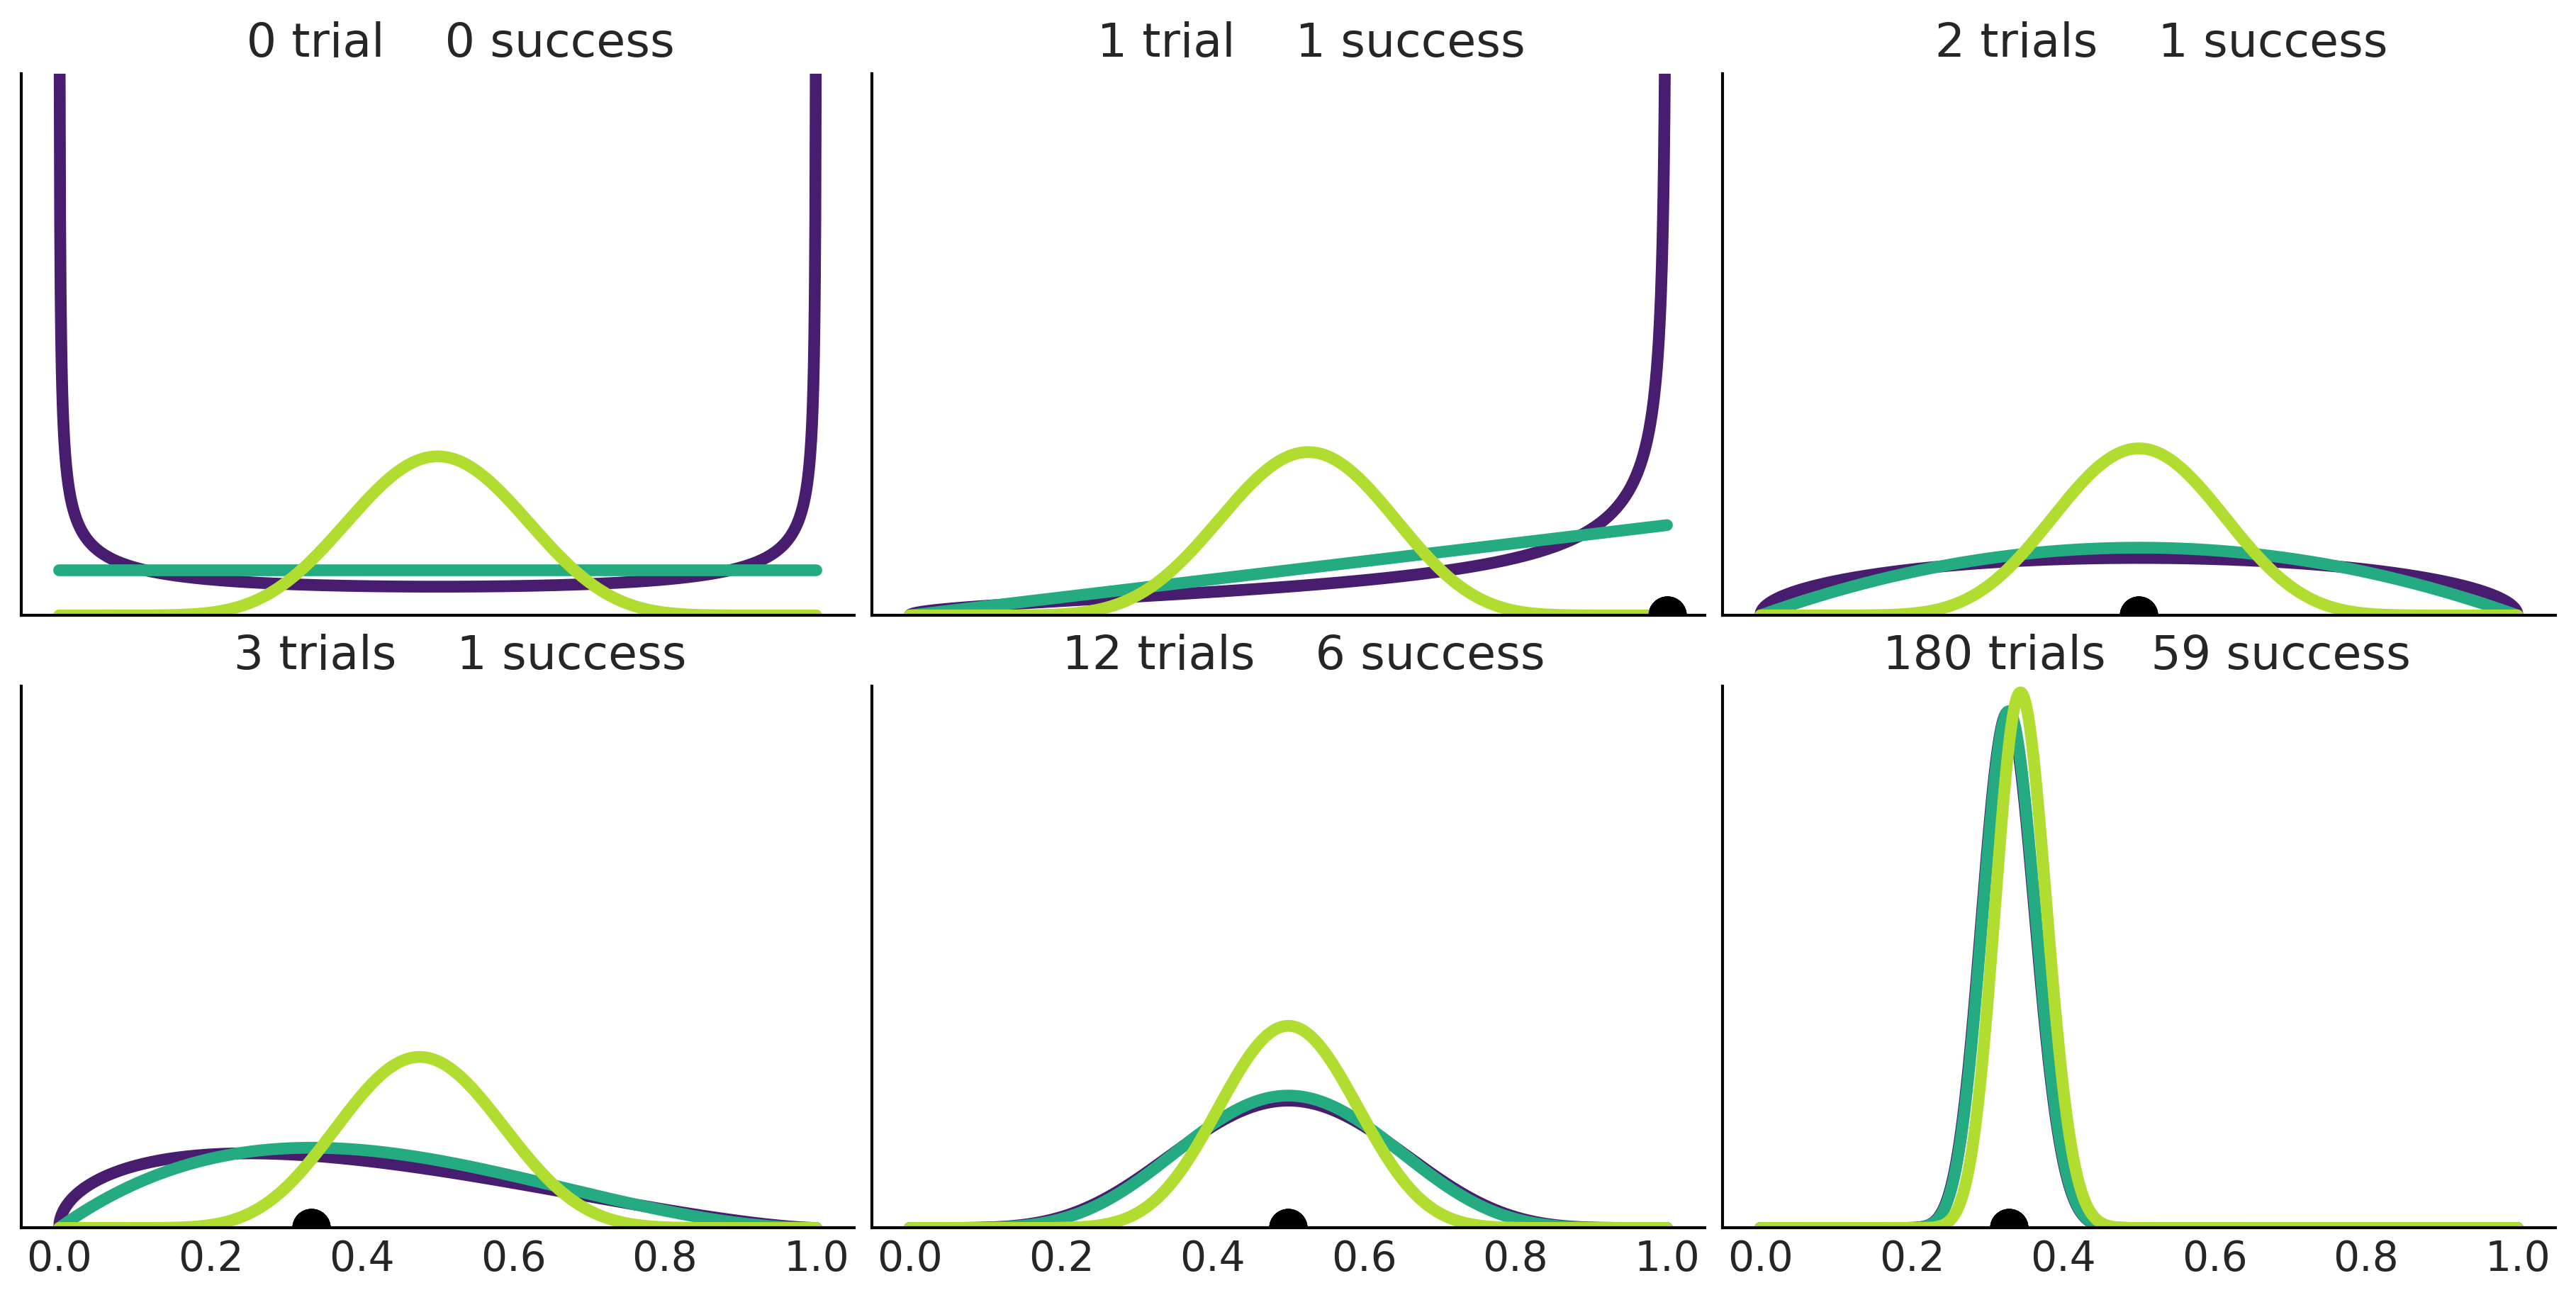

In [16]:
_, axes = plt.subplots(2,3, figsize=(12, 6), sharey=True, sharex=True,
                     constrained_layout=True)
axes = np.ravel(axes)

n_trials = [0, 1, 2, 3, 12, 180]
success = [0, 1, 1, 1, 6, 59]
data = zip(n_trials, success)

beta_params = [(0.5, 0.5), (1, 1), (10, 10)]
θ = np.linspace(0, 1, 1500)
for idx, (N, y) in enumerate(data):
    s_n = ('s' if (N > 1) else '')
    for jdx, (a_prior, b_prior) in enumerate(beta_params):
        p_theta_given_y = stats.beta.pdf(θ, a_prior + y, b_prior + N - y)

        axes[idx].plot(θ, p_theta_given_y, lw=4, color=viridish[jdx])
        axes[idx].set_yticks([])
        axes[idx].set_ylim(0, 12)
        axes[idx].plot(np.divide(y, N), 0, color='k', marker='o', ms=12)
        axes[idx].set_title(f'{N:4d} trial{s_n} {y:4d} success')

plt.savefig('img/chp01/beta_binomial_update.png')

```{figure} figures/beta_binomial_update.png
:name: fig:beta_binomial_update
:width: 8.00in
Successive prior updating starting from 3 different priors and
increasing the number of trials (and possible the number of successes
too). The black dot represents the sampling proportion estimator
$\hat \theta = \frac{y}{n}$.
```

The mean of the Beta distribution is $\frac{\alpha}{\alpha + \beta}$,
thus the prior mean is:

```{math}
:label: beta_prior_mean
\mathbb{E}[\theta]  = \frac{\alpha}{\alpha + \beta}
```

and the posterior mean is:

```{math}
:label: beta_posterior_mean
:label: eq:beta_binom_mean
\mathbb{E}[\theta \mid Y]  = \frac{\alpha + y}{\alpha + \beta + n}

```

We can see that if the value of $n$ is small in relation with the values
of $\alpha$ and $\beta$ then the posterior mean will be closer to the
prior mean. That is, the prior contributes more to the result than the
data. If we have the opposite situation the posterior mean will be
closer to the sampling proportion estimator $\hat \theta = \frac{y}{n}$,
in fact in the limit of $n \rightarrow \infty$ the posterior mean will
exactly match the sample proportion no matter which prior values we
choose for $\alpha$ and $\beta$.

For the Beta Binomial model the posterior mode is:

```{math}
:label: eq:beta_binom_mode
\operatorname*{argmax}_{\theta}{[\theta \mid Y]}  = \frac{\alpha + y - 1}{\alpha + \beta + n - 2}

```

We can see that when the prior is Beta$(\alpha\!=\!1, \beta\!=\!1)$
(Uniform) the posterior mode is numerically equivalent to the sampling
proportion estimator $\hat \theta = \frac{y}{n}$. The posterior mode is
often called the **maximum a posteriori** (MAP) value. This result is
not exclusive for the Beta-Binomial model. In fact the results from many
non-Bayesian methods can be understood as the MAP from Bayesian methods
under some particular priors [^15].

Compare Equation {eq}`eq:beta_binom_mean` to the sampling proportion
$\frac{y}{n}$. The Bayesian estimator is adding $\alpha$ to the number
of successes and $\alpha + \beta$ to the number of trials. Which makes
$\beta$ the number of failures. In this sense we can think of the prior
parameters as *pseudo counts* or if you want prior data. A prior
$\text{Beta}(1, 1)$ is equivalent to having two trials with 1 success
and 1 failure. Conceptually, the shape of the Beta distribution is
controlled by parameter $\alpha$ and $\beta$, the observed data updates
the prior so that it shifts the shape of the Beta distribution closer
and more narrowly to the majority of observations. For values of
$\alpha < 1$ and/or $\beta < 1$ the prior interpretations becomes a
little bit weird as a literal interpretation would say that the prior
$\text{Beta}(0.5, 0.5)$ corresponds to 1 trial with half failure and
half success or maybe one trial with undetermined outcome. Spooky!

[^13]: For more examples check
    <https://en.wikipedia.org/wiki/Conjugate_prior#Table_of_conjugate_distributions>

[^14]: Except, the ones happening in your brain.

[^15]: For example, a regularized linear regression with a L2
    regularization is the same as using a Gaussian prior on the
    coefficient.

(objective-priors)=

### 1.4.2 Objective Priors

In the absence of prior information, it sounds reasonable to follow the
*principle of indifference* also known as the *principle of insufficient
reason*. This principle basically says that if you do not have
information about a problem then you do not have any reason to believe
one outcome is more likely than any other. In the context of Bayesian
statistics this principle has motivated the study and use of **objective
priors**. These are systematic ways of generating priors that have the
least possible influence on a given analysis. The champions of ascetic
statistics favor objective priors as these priors eliminate the
*subjectivity* from prior elicitation. Of course this does not remove
other sources of subjectivity such as the choice of the likelihood, the
data selection process, the choice of the problem being modeled or
investigated, and a long *et cetera*.

One procedure to obtain objective priors is known as Jeffreys' prior
(JP). These type of priors are often referred as *non-informative* even
when priors are always informative in some way. A better description is
to say that JPs have the property of being invariant under
**reparametrization**, i.e. writing an expression in a different but
mathematically equivalent way. Let us explain what this exactly means
with an example. Suppose Alice has a binomial likelihood with unknown
parameter $\theta$, she chooses a prior and computes a posterior.
Alice's friend Bob is interested on the same problem but instead of the
number of success $\theta$, Bob is interested on the **odds** of the
success, i.e. $\kappa$, with $\kappa = \frac{\theta}{1-\theta}$. Bob has
two choices: uses Alice's posterior over $\theta$ to compute $\kappa$
[^16] or choose a prior over $\kappa$ to compute the posterior by
himself. JPs guarantee that if both Alice and Bob use JPs then no matter
which of the two choices Bob takes in order to compute the posteriors,
he will get the same result. In this sense we say the results are
invariant to the chosen parameterization. A corollary of this
explanation could be, that unless we use JPs there is no guarantee that
two (or more) parameterization of a model will necessarily lead to
posteriors that are coherent.

For the one-dimensional case JP for $\theta$ is

```{math}
:label: eq:Jeffreys_prior0
p(\theta) \propto \sqrt{I(\theta)}

```

where $I(\theta)$ is the expected Fisher information:

```{math}
:label: eq:Jeffreys_prior
I(\theta) = - \mathbb{E_{Y}}\left[\frac{d^2}{d\theta^2} \log p(Y \mid \theta)\right]

```

Once the likelihood function $p(Y \mid \theta)$ has been decided by the
practitioner, then the JP gets automatically determined, eliminating any
discussion over prior choices, until that annoying person at the back of
the conference room objects your choice of a JP in the first place.

For a detailed derivation of the JPs for both Alice and Bob problem see
Section {ref}`Jeffreys_prior_derivation`. If you
want to skip those details here we have the JP for Alice:

```{math}
:label: fig:alice_prior
p(\theta) \propto \theta^{-0.5} (1-\theta)^{-0.5}
```

This turns to be the kernel of the $\text{Beta}(0.5, 0.5)$ distribution.
Which is a u-shaped distribution as shown in the left-top panel of
{numref}`fig:Jeffrey_priors`.

For Bob the JP is:

```{math}
:label: fig:bob_prior
p(\kappa) \propto \kappa^{-0.5} (1 + \kappa)^{-1}

```

This is a half-u-shaped distribution, defined in the $[0, \infty)$
interval, see top-right panel in {numref}`fig:Jeffrey_priors`. Saying
this is a half-u-shaped may sound a little bit weird. Actually it is not
that weird when we find that this is the kernel of a close cousin of the
Beta distribution, the Beta-prime distribution with parameters
$\alpha=\beta=0.5$.

```{figure} figures/Jeffrey_priors.png
:name: fig:Jeffrey_priors
:width: 8.00in
Top: Jeffreys' prior (unnormalized) for the binomial likelihood
parameterized in term of the number of success $\theta$ (left) or in
term of the odds $\kappa$ (right). Bottom: Jeffreys' posteriors
(unnormalized) for the binomial likelihood parameterized in term of the
number of success $\theta$ (left) or in term of the odds $\kappa$
(right). The arrows between the posteriors indicate that the posterior
are inter-convertible by applying the change of variable rule (see Section
{ref}`transformations` for details).
```

Notice that as the expectation in Equation {eq}`eq:Jeffreys_prior` is
with respect to $Y \mid \theta$, that is an expectation over the sample
space. This means that in order to obtain a JP we need to average over
all possible experimental outcomes. This is a violation of the
likelihood principle [^17] as the inferences about $\theta$ depends not
just on the data at hand, but also on the set of potentially (but not
yet) observed data.

A JP can be improper prior, meaning that it does not integrate to 1. For
example, the JP for the mean of a Gaussian distribution of known
variance is uniform over the entire real line. Improper priors are fine
as long as we verify that the combination of them with a likelihood
produces a proper posterior distribution, that is one integrating to 1.
Also notice that we can not draw random samples from improper priors
(i.e., they are non-generative) this can invalidate many useful tools
that allow us to reason about our model.

JPs are not the only way to obtain an objective prior. Another possible
route is to obtain a prior by maximizing the expected Kullback-Leibler
divergence (see Section {ref}`DKL`) between the prior and posterior. These
kind of priors are known as Bernardo reference priors. They are
objective as these are the priors that *allow the data to bring* the
maximal amount of information into the posterior distribution. Bernardo
reference priors and Jeffreys' prior do not necessarily agree.
Additionally, objective priors may not exist or be difficult to derive
for complicated models.

[^16]: For example, if we have samples from the posterior, then we can
    plug those samples of $\theta$ into
    $\kappa = \frac{\theta}{1-\theta}$.

[^17]: <https://en.wikipedia.org/wiki/Likelihood_principle>

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23456\1383262846.py:2: RuntimeWarning: divide by zero encountered in divide
  κ = (θ / (1-θ))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23456\1383262846.py:10: RuntimeWarning: divide by zero encountered in power
  axes[0, 0].plot(θ, θ**(-0.5) * (1-θ)**(-0.5))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23456\1383262846.py:15: RuntimeWarning: divide by zero encountered in power
  axes[0, 1].plot(κ, κ**(-0.5) * (1 + κ)**(-1))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23456\1383262846.py:17: RuntimeWarning: invalid value encountered in multiply
  axes[1, 1].plot(κ, κ**(y-0.5) * (1 + κ)**(-n-1))


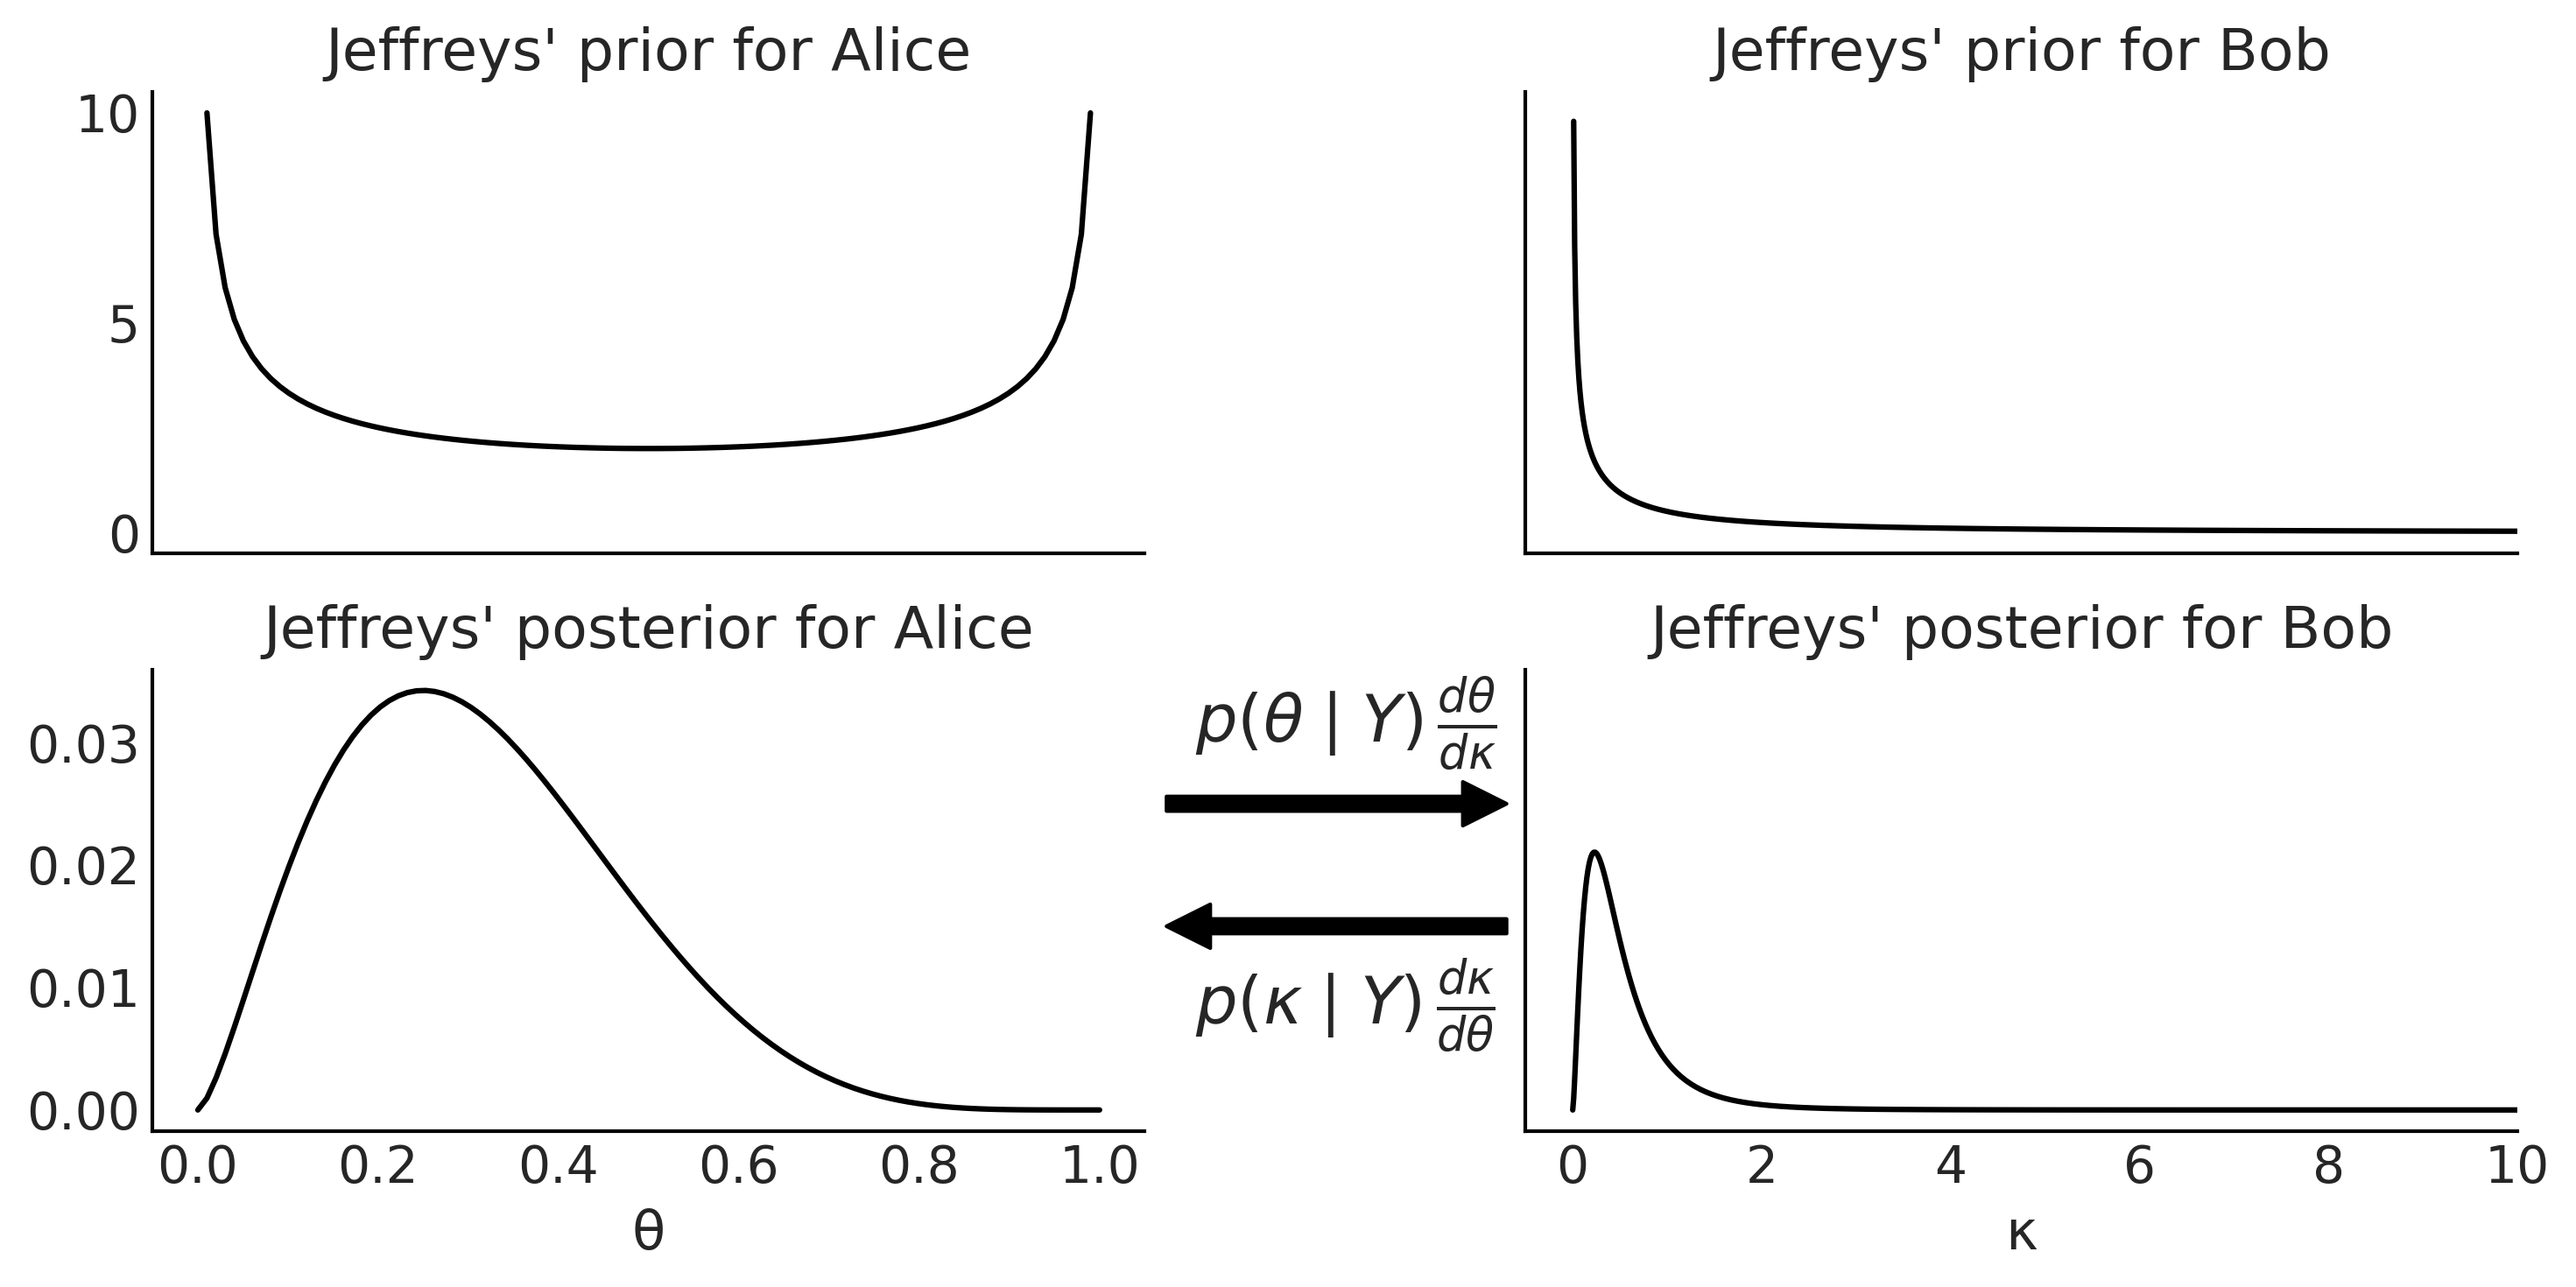

In [17]:
θ = np.linspace(0, 1, 100)
κ = (θ / (1-θ))
y = 2
n = 7

_, axes = plt.subplots(2, 2, figsize=(10, 5),
                     sharex='col', sharey='row', constrained_layout=False)

axes[0, 0].set_title("Jeffreys' prior for Alice")
axes[0, 0].plot(θ, θ**(-0.5) * (1-θ)**(-0.5))
axes[1, 0].set_title("Jeffreys' posterior for Alice")
axes[1, 0].plot(θ, θ**(y-0.5) * (1-θ)**(n-y-0.5))
axes[1, 0].set_xlabel("θ")
axes[0, 1].set_title("Jeffreys' prior for Bob")
axes[0, 1].plot(κ, κ**(-0.5) * (1 + κ)**(-1))
axes[1, 1].set_title("Jeffreys' posterior for Bob")
axes[1, 1].plot(κ, κ**(y-0.5) * (1 + κ)**(-n-1))
axes[1, 1].set_xlim(-0.5, 10)
axes[1, 1].set_xlabel("κ")
axes[1, 1].text(-4.0, 0.030, size=18, s=r'$p(\theta \mid Y) \, \frac{d\theta}{d\kappa}$')
axes[1, 1].annotate("", xy=(-0.5, 0.025), xytext=(-4.5, 0.025),
                  arrowprops=dict(facecolor='black', shrink=0.05))
axes[1, 1].text(-4.0, 0.007, size=18, s= r'$p(\kappa \mid Y) \, \frac{d\kappa}{d\theta}$')
axes[1, 1].annotate("", xy=(-4.5, 0.015), xytext=(-0.5, 0.015),
                  arrowprops=dict(facecolor='black', shrink=0.05),
                  annotation_clip=False)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.tight_layout()
plt.savefig("img/chp01/Jeffrey_priors.png")

(maximum-entropy-priors)=

### 1.4.3 Maximum Entropy Priors

Yet another way to justify a choice of priors is to pick the prior with
the highest entropy. If we are totally indifferent about the plausible
values then such prior turns out to be the Uniform distribution over the
range on plausible values [^18]. But what about when we are not
completely indifferent about the plausible values a parameter can take?
For example, we may know our parameter is restricted to the
$[0, \infty)$ interval. Can we obtain a prior that has maximum entropy
while also satisfying a given constraint? Yes we can and that is exactly
the idea behind maximum entropy priors. In the literature it is common
to find the word MaxEnt when people talk about the maximum entropy
principle.

In order to obtain a maximum entropy prior we need to solve an
optimization problem taking into account a set of constraints.
Mathematically this can be done using what is known as Lagrangian
multipliers. Instead of a formal proof we are going to use a couple code
examples to gain some intuition.

{numref}`fig:max_entropy` shows 3 distributions obtained by entropy
maximization. The purple distribution is obtained under no constraint,
and we are happy to find that this is indeed the Uniform distribution as
expected from the discussion about entropy in Section {ref}`entropy`. If
we do not know anything about the problem all events are equally likely
a priori. The second distribution, in cyan, is obtained under the
constraint that we know the mean value of the distribution. In this
example the mean value is 1.5). Under this constraint we get an
Exponential-like distribution. The last one in yellow-green was obtained
under the restriction that the value 3 and 4 are known to appear with a
probability of 0.8. If you check Code Block [max_ent_priors](max_ent_priors) you will see all
distributions were computed under two constraints that probabilities can
only take values in the interval $[0, 1]$ and that the total probability
must be 1. As these are general constraints for valid probability
distribution we can think of them as *intrinsic* or even *ontological*
constraints. For that reason we say that the purple distribution in
{numref}`fig:max_entropy` was obtained under no-constraint.

[^18]: See Section {ref}`entropy` for more details.

Listing 1.8 max_ent_priors

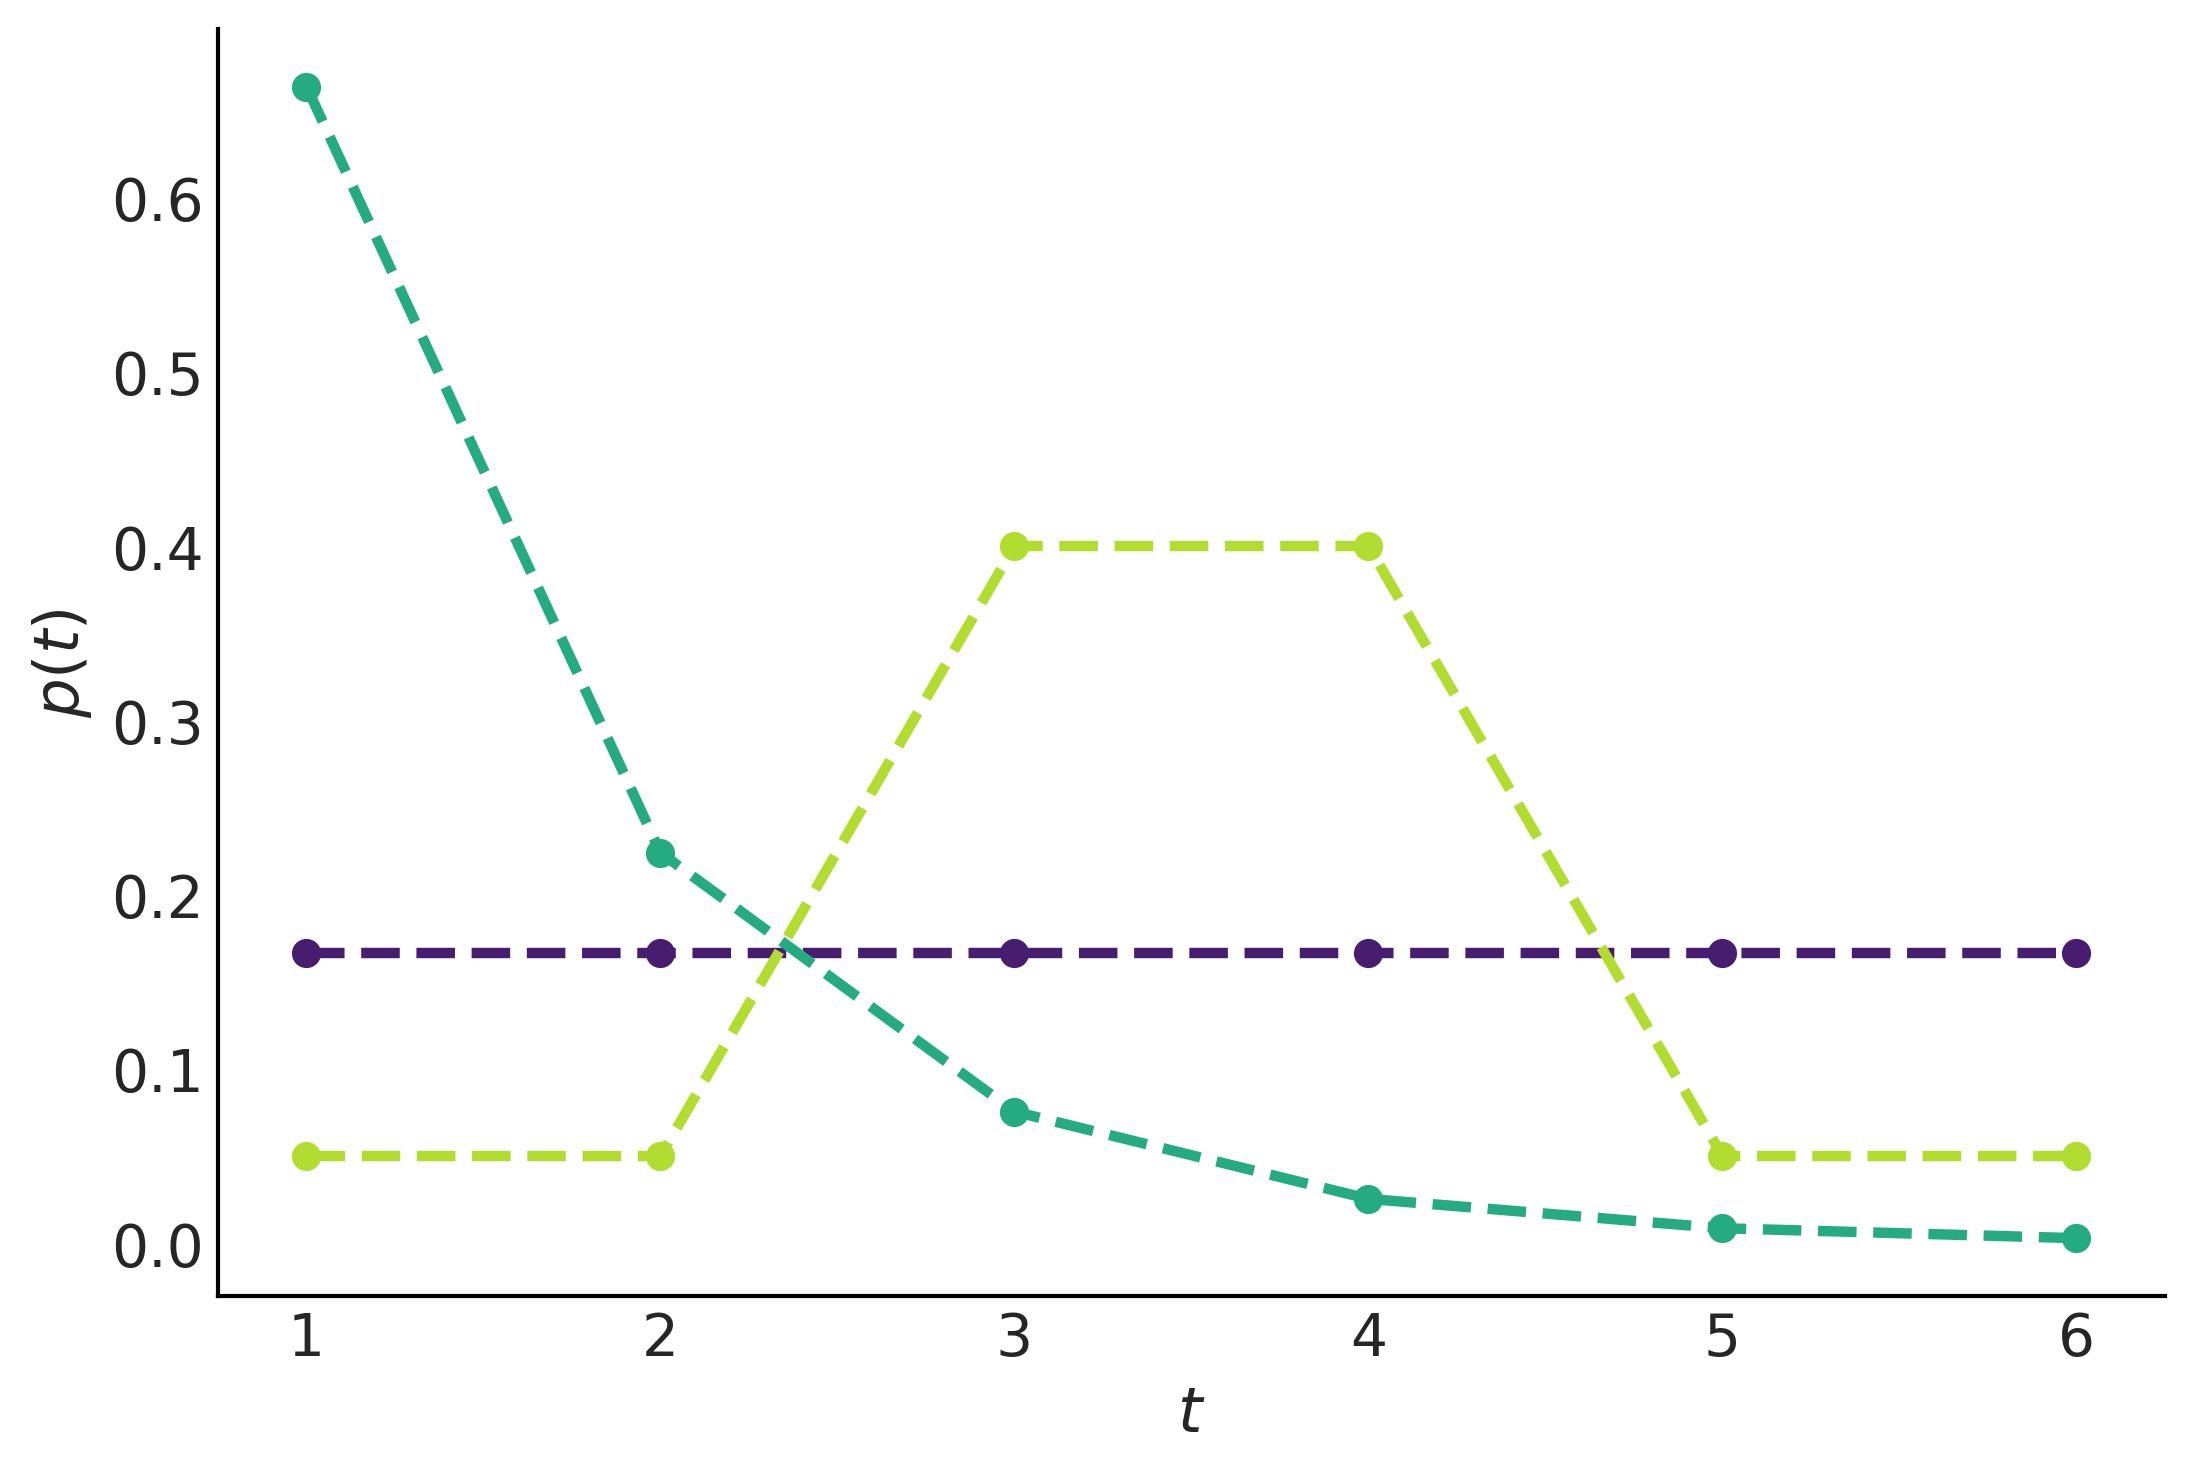

In [18]:
cons = [[{"type": "eq", "fun": lambda x: np.sum(x) - 1}],
        [{"type": "eq", "fun": lambda x: np.sum(x) - 1},
         {"type": "eq", "fun": lambda x: 1.5 - np.sum(x * np.arange(1, 7))}],
        [{"type": "eq", "fun": lambda x: np.sum(x) - 1},
         {"type": "eq", "fun": lambda x: np.sum(x[[2, 3]]) - 0.8}]]

max_ent = []
for i, c in enumerate(cons):
    val = minimize(lambda x: -entropy(x), x0=[1/6]*6, bounds=[(0., 1.)] * 6,
                   constraints=c)['x']
    max_ent.append(entropy(val))
    plt.plot(np.arange(1, 7), val, 'o--', color=viridish[i], lw=2.5)
plt.xlabel("$t$")
plt.ylabel("$p(t)$")

plt.savefig("img/chp01/max_entropy.png")

```{figure} figures/max_entropy.png
:name: fig:max_entropy
:width: 8.00in
Discrete distributions obtained by maximizing the entropy under
different constraints. We are using the function `entropy` from
`scipy.stats` to estimate these distributions. Notice how adding
constraints can drastically change the distribution.
```

We can think of the maximum entropy principle as the procedure of
choosing the flattest distribution, and by extension the flattest prior
distribution, under a given constraint. In {numref}`fig:max_entropy` the
Uniform distribution is the flattest distribution, but notice that the
distribution in green is also the flattest distribution once we include
the restriction that the values 3 and 4 have a 80% chance of arising.
Notice how the values 3 and 4 have both a probability of 0.4, even when
you have infinite other ways to combine their probabilities to obtain
the target value of 0.8, like 0+0.8, 0.7+0.1, 0.312+0.488 and so on.
Also notice something similar is true for the values 1, 2, 5 and 6, they
have a total probability of 0.2 which is evenly distributed (0.05 for
each value). Now take a look at the Exponential-like curve, which
certainly does not look very flat, but once again notice that other
choices will be less flat and more concentrated, for example, obtaining
1 and 2 with 50% chance each (and thus zero change for the values 3 to
6), which will also have 1.5 as the expected value.

In [19]:
ite = 100_000
entropies = np.zeros((3, ite))
for idx in range(ite):
    rnds = np.zeros(6)
    total = 0
    x_ = np.random.choice(np.arange(1, 7), size=6, replace=False)
    for i in x_[:-1]:
        rnd = np.random.uniform(0, 1-total)
        rnds[i-1] = rnd
        total = rnds.sum()
    rnds[-1] = 1 - rnds[:-1].sum()
    H = entropy(rnds)
    entropies[0, idx] = H
    if abs(1.5 - np.sum(rnds * x_)) < 0.01:
        entropies[1, idx] = H
    prob_34 = sum(rnds[np.argwhere((x_ == 3) | (x_ == 4)).ravel()])
    if abs(0.8 - prob_34) < 0.01:
        entropies[2, idx] = H

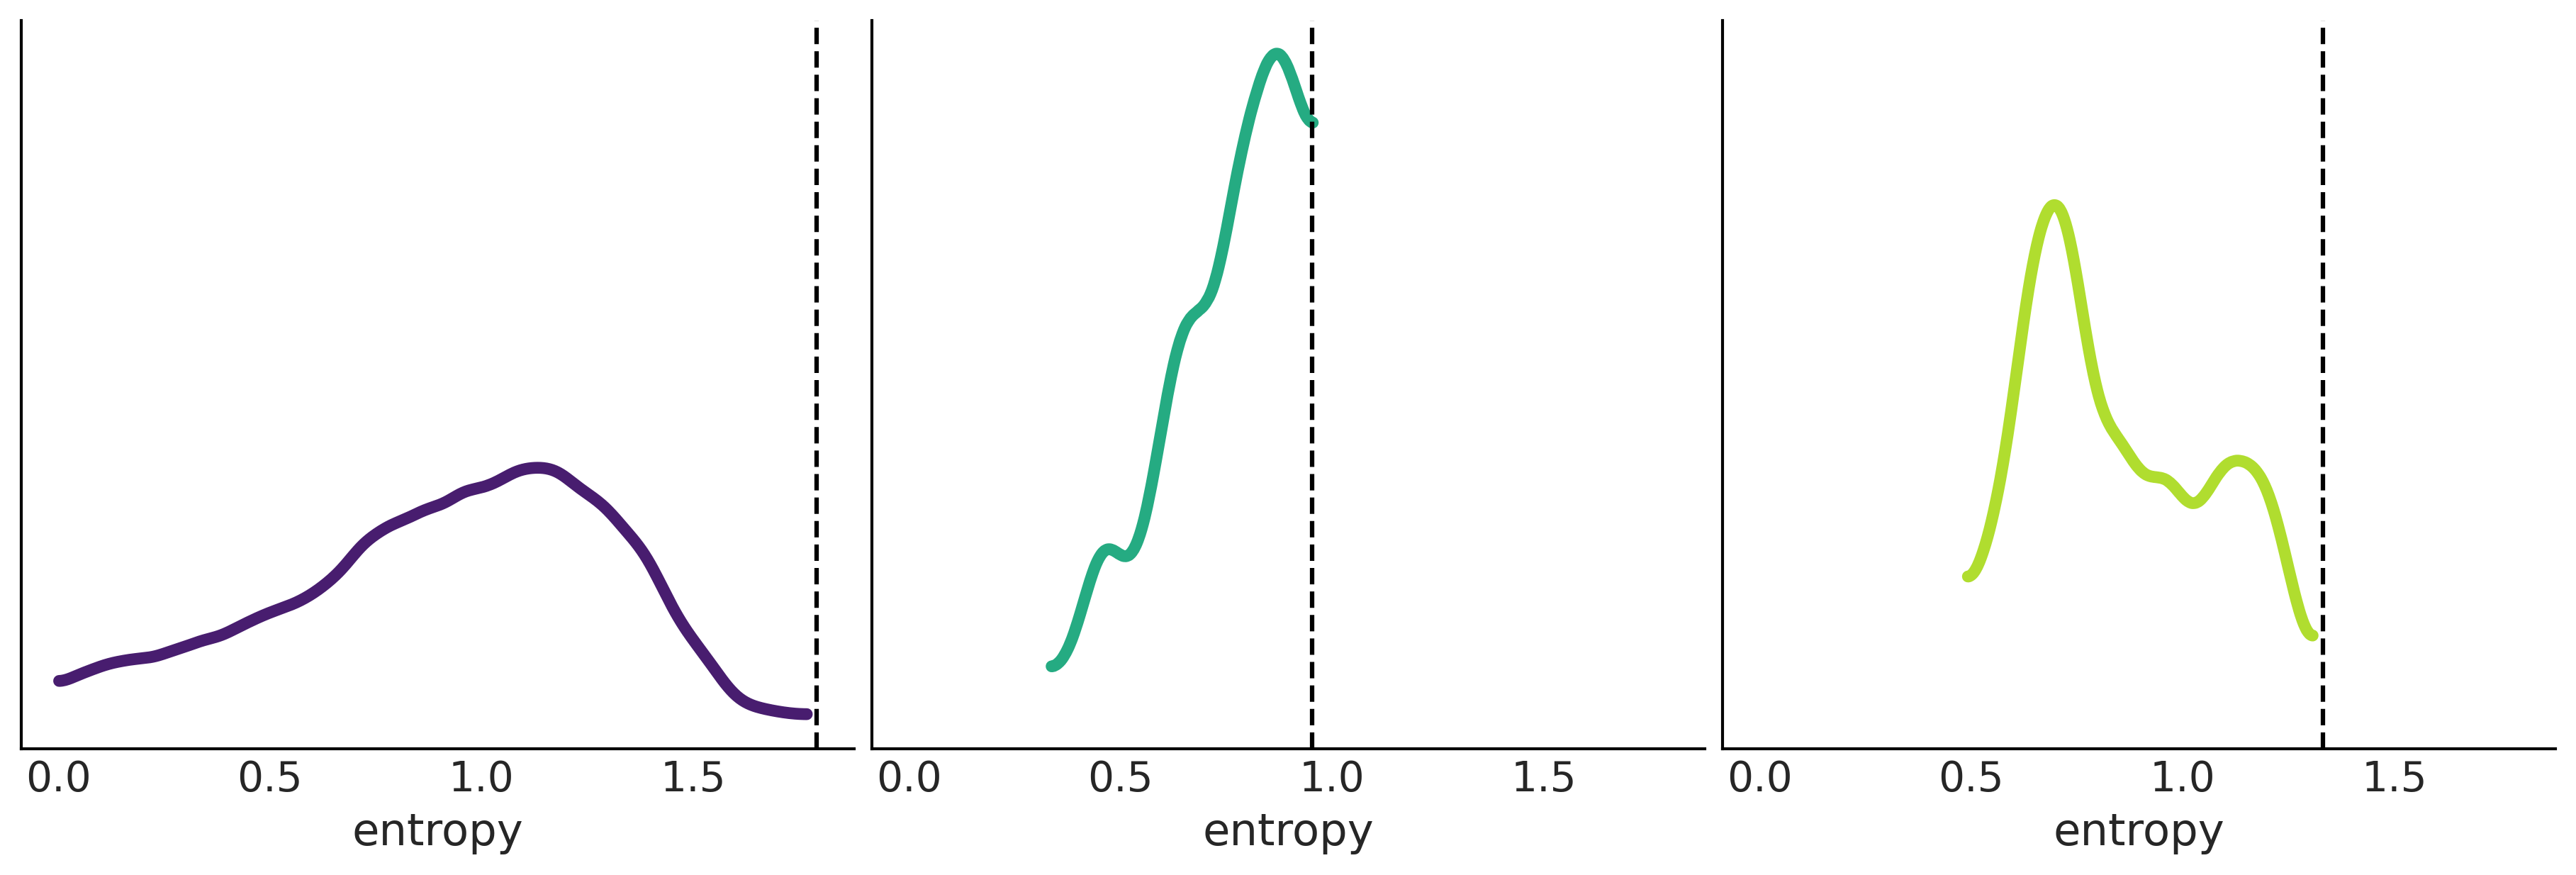

In [20]:
_, ax = plt.subplots(1, 3, figsize=(12,4), sharex=True, sharey=True, constrained_layout=True)

for i in range(3):
    az.plot_kde(entropies[i][np.nonzero(entropies[i])], ax=ax[i], plot_kwargs={"color":viridish[i], "lw":4})
    ax[i].axvline(max_ent[i], 0, 1, ls="--")
    ax[i].set_yticks([])
    ax[i].set_xlabel("entropy")
plt.savefig("img/chp01/max_entropy_vs_random_dist.png")

{numref}`fig:max_entropy_vs_random_dist` shows the distribution of
entropies computed for randomly generated samples under the exact same
conditions as the 3 distributions in {numref}`fig:max_entropy`. The
dotted vertical line represents the entropy of the curves in
{numref}`fig:max_entropy_vs_random_dist`. While this is not a proof,
this experiment seems to suggest that there is no distribution with
higher entropy than the distributions in
{numref}`fig:max_entropy_vs_random_dist`, which is in total agreement
with what the theory tells us.

```{figure} figures/max_entropy_vs_random_dist.png
:name: fig:max_entropy_vs_random_dist
:width: 8.00in
The distribution of entropy for a set of randomly generated
distributions. The dotted vertical line indicates the value for the
distributions with maximum entropy, computed with Code Block
[max_ent_priors](max_ent_priors). We can see that none of
the randomly generated distributions have an entropy larger that the
distributions with maximum entropy, while this is no formal proof, this
is certainly reassuring.
```

The distributions with the largest entropy under the following
constraints are [^19]:

-   No constraints: Uniform (continuous or discrete, according to the
    type of variable)

-   A positive mean, with support $[0, \infty)$: Exponential

-   An absolute deviation to the mean, with support $(-\infty, \infty)$: Laplace
    (also known as double Exponential)

-   A given mean and variance, with support $(-\infty, \infty)$: Normal
    distribution

-   A given mean and variance, with support $[-\pi, \pi]$: Von Mises

-   Only two unordered outcomes and a constant mean: Binomial, or the
    Poisson if we have rare events (the Poisson can be seen as a special
    case of the binomial)

It is interesting to note that many of the generalized linear models
like the ones described in Chapter [3](chap2) are traditionally
defined using maximum entropy distributions, given the constraints of
the models. Similar to objective priors, MaxEnt prior may not exist or
are difficult to derive.

[^19]: Wikipedia has a longer list at
    <https://en.wikipedia.org/wiki/Maximum_entropy_probability_distribution#Other_examples>

(weakly-informative-priors-and-regularization-priors)=

### 1.4.4 Weakly Informative Priors and Regularization Priors

In previous sections we used general procedures to generate vague,
non-informative priors designed to not put *too much* information into
our analysis. These procedures to generate priors also provide a
"somehow\" automated way of generating priors. These two features may
sound appealing, and in fact they are for a large number of Bayesian
practitioners and theorists.

But in this book we will not rely too much on these kinds of priors. We
believe prior elicitation (as other modeling decisions) should be
context dependent, meaning that details from specific problems and even
idiosyncrasies of a given scientific field could inform our choice of
priors. While MaxEnt priors can incorporate some of these restrictions
it is possible to move a little bit closer to the informative end of the
informativeness prior spectrum. We can do this with so called weakly
informative priors.

What constitutes a weakly informative priors is usually not
mathematically well defined as JPs or MaxEnt are. Instead they are more
*empirical* and *model-driven*, that is they are defined through a
combination of relevant domain expertise and the model itself. For many
problems, we often have information about the values a parameter can
take. This information can be derived from the physical meaning of the
parameter. We know heights have to be positive. We may even know the
plausible range a parameter can take from previous experiments or
observations. We may have strong reasons to justify a value should be
close to zero or above some predefined lower-bound. We can use this
information to weakly inform our analysis while keeping a good dose of
ignorance to us from *to pushing too much*.

Using the Beta-Binomial example again,
{numref}`fig:prior_informativeness_spectrum` shows four alternative
priors. Two of them are the JP and maximum entropy prior from previous
sections. One is what could be called a weakly informative prior that gives
preference to a value of $\theta=0.5$ while still being broad or
relatively vague about other values. The last is an informative prior,
narrowly centered around $\theta=0.8$ [^20]. Using informative priors is
a valid option if we have good-quality information from theory, previous
experiments, observational data, etc. As informative priors are very
strong priors conveying a lot of information they generally require a
stronger justification than other priors. As Carl Sagan used to say
"Extraordinary claims require extraordinary evidence" {cite:p}`Deming2016`. It
is important to remember that informativeness of the prior depends on
model and model context. An uninformative prior in one context can
become highly informative in another {cite:p}`LikehoodandPrior`. For instance
if modeling the mean height of adult humans in meters, a prior of
$\mathcal{N}(2,1)$ can be considered uninformative, but if estimating
the height of giraffes that same prior becomes highly informative as in
reality giraffe heights differ greatly than human heights.

```{figure} figures/prior_informativeness_spectrum.png
:name: fig:prior_informativeness_spectrum
:width: 8.00in
Prior informativeness spectrum: While Jeffreys and MaxEnt priors are
uniquely defined for a binomial likelihood, weakly informative and
informative priors are not and instead depend on previous information
and practitioner's modeling decisions.
```

Because weakly-informative priors work to keep the posterior
distribution within certain reasonable bounds, they are also known as
regularizing priors. Regularization is a procedure of adding information
with the aim of solving an ill-posed problem or to reduce the chance of
overfitting and priors offer a principled way of performing
regularization.

In this book, more often than not, we will use weakly-informative
priors. Sometimes the prior will be used in a model without too much
justification, simply because the focus of the example may be related to
other aspects of the Bayesian modeling workflow. But we will also show
some examples of using prior predictive checks to help us calibrate our
priors.

::: {admonition} Overfitting

Overfitting occurs when a model generates predictions very
close to the limited dataset used to fit it, but it fails to fit
additional data and/or predict future observations reasonably well. That
is it fails to generalize its predictions to a wider set of possible
observations. The counterpart of overfitting is underfitting, which is
when a model fails to adequately capture the underlying structure of the
data. We will discuss more about there topics in Sections
{ref}`model_cmp` and {ref}`information_criterion`.
:::

[^20]: Even when the definition of such priors will require more context
    than the one provided, we still think the example conveys a useful
    intuition, that will be refined as we progress through this book.

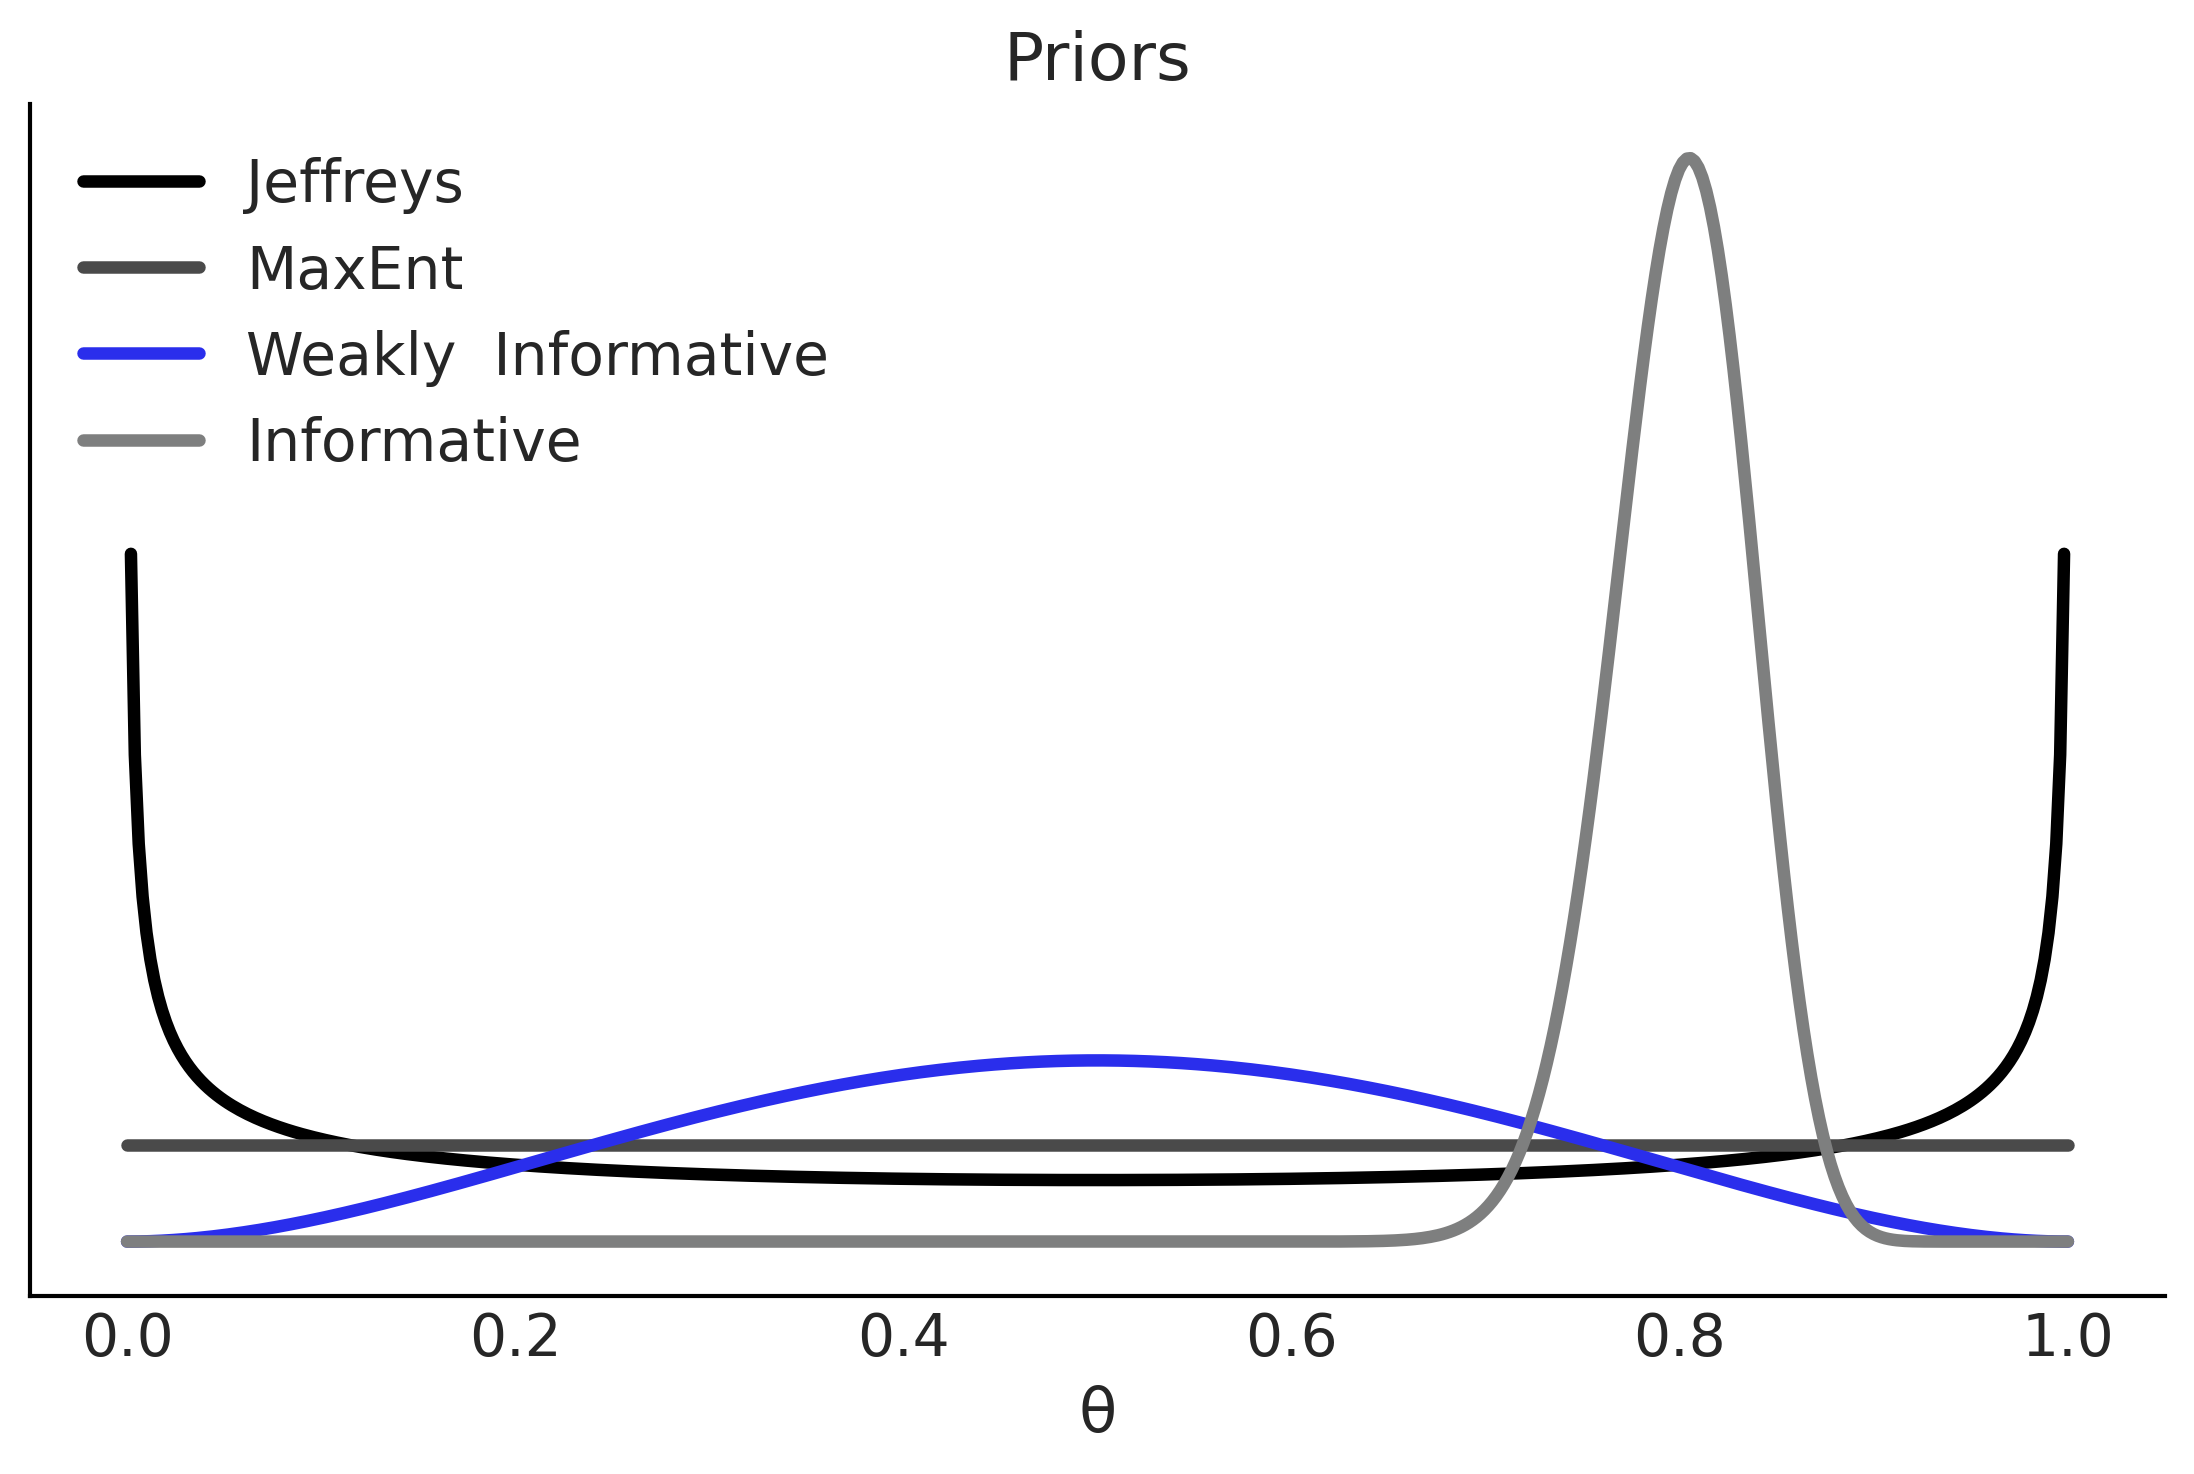

In [21]:
x = np.linspace(0, 1, 500)
params = [(0.5, 0.5), (1, 1), (3,3), (100, 25)]

labels = ["Jeffreys", "MaxEnt", "Weakly  Informative",
          "Informative"]

_, ax = plt.subplots()
for (α, β), label, c in zip(params, labels, (0, 1, 4, 2)):
    pdf = stats.beta.pdf(x, α, β)
    ax.plot(x, pdf, label=f"{label}", c=f"C{c}", lw=3)
    ax.set(yticks=[], xlabel="θ", title="Priors")
    ax.legend()
plt.savefig("img/chp01/prior_informativeness_spectrum.png")

### 1.4.5 Using Prior Predictive Distributions to Assess Priors

When evaluating the choice of priors, the prior predictive distribution
shown in {ref}`Automating_inference` is a handy tool. By sampling from
the prior predictive distribution, the computer does the work of
translating choices made in the parameter space into samples in the
observed variable space. Thinking in terms of observed values is
generally easier than thinking in terms of the model's parameters which
makes model evaluation easier. Following a Beta Binomial model, instead
of judging whether a particular value of $\theta$ is plausible, prior
predictive distributions allow us to judge whether a particular number
of successes is plausible. This becomes even more useful for complex
models where parameters get transformed through many mathematical
operations or multiple priors interact with each other. Lastly,
computing the prior predictive could help us ensure our model has been
properly written and is able to run in our probabilistic programming
language and can even help us to debug our model. In the following
chapters, we will see more concrete examples of how to reason about
prior predictive samples and use them to choose reasonable priors.

(exercises1)=

## 1.5 Exercises

Problems are labeled Easy (E), Medium (M), and Hard (H).

**1E1.** As we discussed, models are artificial
representations used to help define and understand an object or process.
However, no model is able to perfectly replicate what it represents and
thus is deficient in some way. In this book we focus on a particular
type of models, statistical models. What are other types of models you
can think of? How do they aid understanding of the thing that is being
modeled? How are they deficient?

**1E2.** Match each of these verbal descriptions to their
corresponding mathematical expression:

1.  The probability of a parameter given the observed data

2.  The distribution of parameters before seeing any data

3.  The plausibility of the observed data given a parameter value

4.  The probability of an unseen observation given the observed data

5.  The probability of an unseen observation before seeing any data

**1E3.** From the following expressions, which one
corresponds to the sentence, The probability of being sunny given that
it is July 9th of 1816?

1.  $p(\text{sunny})$

2.  $p(\text{sunny} \mid \text{July})$

3.  $p(\text{sunny} \mid \text{July 9th of 1816})$

4.  $p(\text{July 9th of 1816} \mid \text{sunny})$

5.  $p(\text{sunny}, \text{July 9th of 1816}) / p(\text{July 9th of 1816})$

**1E4.** Show that the probability of choosing a human at
random and picking the Pope is not the same as the probability of the
Pope being human. In the animated series Futurama, the (Space) Pope is a
reptile. How does this change your previous calculations?

**1E5.** Sketch what the distribution of possible observed
values could be for the following cases:

1.  The number of people visiting your local cafe assuming Poisson
    distribution

2.  The weight of adult dogs in kilograms assuming a Uniform
    distribution

3.  The weight of adult elephants in kilograms assuming Normal
    distribution

4.  The weight of adult humans in pounds assuming skew Normal
    distribution

**1E6.** For each example in the previous exercise, use SciPy
to specify the distribution in Python. Pick parameters that you believe
are reasonable, take a random sample of size 1000, and plot the
resulting distribution. Does this distribution look reasonable given
your domain knowledge? If not adjust the parameters and repeat the
process until they seem reasonable.

**1E7.** Compare priors $\text{Beta}(0.5, 0.5)$,
$\text{Beta}(1, 1)$, $\text{Beta}(1, 4)$. How do the priors differ in
terms of shape?

**1E8**. Rerun Code Block
[binomial_update](binomial_update) but using two
Beta-priors of your choice. Hint: you may what to try priors with
$\alpha \neq \beta$ like $\text{Beta}(2, 5)$.

**1E9.** Try to come up with new constraints in order to
obtain new Max-Ent distributions (Code Block
[max_ent_priors](max_ent_priors))

**1E10.** In Code Block [metropolis_hastings](metropolis_hastings), change the
value of `can_sd` and run the Metropolis-Hastings sampler. Try values
like 0.001 and 1.

1.  Compute the mean, SD, and HDI and compare the values with those in
    the book (computed using `can_sd=0.05`). How different are the
    estimates?

2.  Use the function `az.plot_posterior`.

**1E11.** You need to estimate the weights of blue whales,
humans, and mice. You assume they are normally distributed, and you set
the same prior $\mathcal{HN}(200\text{kg})$ for the variance. What type
of prior is this for adult blue whales? Strongly informative, weakly
informative, or non-informative? What about for mice and for humans? How
does informativeness of the prior correspond to our real world
intuitions about these animals?

**1E12.** Use the following function to explore different
combinations of priors (change the parameters `a` and `b`) and data
(change heads and trials). Summarize your observations.

```python
def posterior_grid(grid=10, a=1, b=1, heads=6, trials=9):
    grid = np.linspace(0, 1, grid)
    prior = stats.beta(a, b).pdf(grid)
    likelihood = stats.binom.pmf(heads, trials, grid)
    posterior = likelihood * prior
    posterior /= posterior.sum()
    _, ax = plt.subplots(1, 3, sharex=True, figsize=(16, 4))
    ax[0].set_title(f"heads = {heads}\ntrials = {trials}")
    for i, (e, e_n) in enumerate(zip(
            [prior, likelihood, posterior],
            ["prior", "likelihood", "posterior"])):
        ax[i].set_yticks([])
        ax[i].plot(grid, e, "o-", label=e_n)
        ax[i].legend(fontsize=14)


interact(posterior_grid,
    grid=ipyw.IntSlider(min=2, max=100, step=1, value=15),
    a=ipyw.FloatSlider(min=1, max=7, step=1, value=1),
    b=ipyw.FloatSlider(min=1, max=7, step=1, value=1),
    heads=ipyw.IntSlider(min=0, max=20, step=1, value=6),
    trials=ipyw.IntSlider(min=0, max=20, step=1, value=9))
```

**1E13.** Between the prior, prior predictive, posterior, and
posterior predictive distributions which distribution would help answer
each of these questions. Some items may have multiple answers.

1.  How do we think is the distribution of parameters values before
    seeing any data?

2.  What observed values do we think we could see before seeing any
    data?

3.  After estimating parameters using a model what do we predict we will
    observe next?

4.  What parameter values explain the observed data after conditioning
    on that data?

5.  Which can be used to calculate numerical summaries, such as the
    mean, of the parameters?

6.  Which can can be used to visualize a Highest Density Interval?

**1M14.** Equation {eq}`eq:posterior_dist` contains the
marginal likelihood in the denominator, which is difficult to calculate.
In Equation {eq}`eq:proportional_bayes` we show that knowing the
posterior up to a proportional constant is sufficient for inference.
Show why the marginal likelihood is not needed for the
Metropolis-Hasting method to work. Hint: this is a pen and paper
exercise, try by expanding Equation {eq}`acceptance_prob`.

**1M15.** In the following definition of a probabilistic
model, identify the prior, the likelihood, and the posterior:

```{math}
:label: eq:probabilistic_model
\begin{split}
Y \sim \mathcal{N}(\mu, \sigma)\\
\mu \sim \mathcal{N}(0, 1)\\
\sigma \sim \mathcal{HN}(1)\\
\end{split}
```

**1M16.** In the previous model, how many parameters will the
posterior have? Compare your answer with that from the model in the
coin-flipping problem in Equation {eq}`eq:beta_binomial`.

**1M17.** Suppose that we have two coins; when we toss the
first coin, half of the time it lands tails and half of the time on
heads. The other coin is a loaded coin that always lands on heads. If we
choose one of the coins at random and observe a head, what is the
probability that this coin is the loaded one?

**1M18.** Modify Code Block
[metropolis_hastings_sampler_rvs](metropolis_hastings_sampler_rvs) to generate random
samples from a Poisson distribution with parameters of your choosing.
Then modify Code Blocks [metropolis_hastings_sampler](metropolis_hastings_sampler) and
[metropolis_hastings](metropolis_hastings) to generate MCMC samples estimating your chosen
parameters. Test how the number of samples, MCMC iterations, and initial
starting point affect convergence to your true chosen parameter.

**1M19.** Assume we are building a model to estimate the mean
and standard deviation of adult human heights in centimeters. Build a
model that will make this estimation. Start with Code Block
[beta_binom](#beta_binom) and change the likelihood and
priors as needed. After doing so then

1.  Sample from the prior predictive. Generate a visualization and
    numerical summary of the prior predictive distribution

2.  Using the outputs from (a) to justify your choices of priors and
    likelihoods

**1M20.** From domain knowledge you have that a given
parameter can not be negative, and has a mean that is roughly between 3
and 10 units, and a standard deviation of around 2. Determine two prior
distributions that satisfy these constraints using Python. This may
require trial and error by drawing samples and verifying these criteria
have been met using both plots and numerical summaries.

**1M21.** A store is visited by $n$ customers on a given day.
The number of customers that make a purchase $Y$ is distributed as
$\text{Bin}(n, \theta)$, where $\theta$ is the probability that a
customer makes a purchase. Assume we know $\theta$ and the prior for $n$
is $\text{Pois}(4.5)$.

1.  Use PyMC3 to compute the posterior distribution of $n$ for all
    combinations of $Y \in {0, 5, 10}$ and $\theta \in {0.2, 0.5}$. Use
    `az.plot_posterior` to plot the results in a single plot.

2.  Summarize the effect of $Y$ and $\theta$ on the posterior

**1H22.** Modify Code Block
[metropolis_hastings_sampler_rvs](metropolis_hastings_sampler_rvs) to generate samples from
a Normal Distribution, noting your choice of parameters for the mean and
standard deviation. Then modify Code Blocks
[metropolis_hastings_sampler](metropolis_hastings_sampler) and [metropolis_hastings](metropolis_hastings) to
sample from a Normal model and see if you can recover your chosen
parameters.

**1H23.** Make a model that estimates the proportion of the
number of sunny versus cloudy days in your area. Use the past 5 days of
data from your personal observations. Think through the data collection
process. How hard is it to remember the past 5 days. What if needed the
past 30 days of data? Past year? Justify your choice of priors. Obtain a
posterior distribution that estimates the proportion of sunny versus
cloudy days. Generate predictions for the next 10 days of weather.
Communicate your answer using both numerical summaries and
visualizations.

**1H24.** You planted 12 seedlings and 3 germinate. Let us
call $\theta$ the probability that a seedling germinates. Assuming
$\text{Beta}(1, 1)$ prior distribution for $\theta$.

1.  Use pen and paper to compute the posterior mean and standard
    deviation. Verify your calculations using SciPy.

2.  Use SciPy to compute the equal-tailed and highest density 94%
    posterior intervals.

3.  Use SciPy to compute the posterior predictive probability that at
    least one seedling will germinate if you plant another 12 seedlings.

After obtaining your results with SciPy repeat this exercise using PyMC3
and ArviZ